# Modelagem Estatística 2018.1

## Universidade Federal do Rio Grande do Norte
### Alunos: Iago Diógenes; Vitor Silva
### Professor: Luiz Affonso

## Introdução a PCA

De forma simples e gráfica, podemos entender o PCA através de um exemplo

Fonte: http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/

- Caso se tenha mais de 3 variáveis, é difícil visualizar os dados.

- O tamanho da variância de cada componente principal é medida através de seus autovalores.

*"Principal component analysis is used to extract the important information from a multivariate data table and to express this information as a set of few new variables called principal components. These new variables correspond to a linear combination of the originals. The number of principal components is less than or equal to the number of original variables."*



![img](http://www.sthda.com/english/sthda-upload/figures/principal-component-methods/006-principal-component-analysis-scatter-plot-data-mining-1.png)

![img](http://www.sthda.com/english/sthda-upload/figures/principal-component-methods/006-principal-component-analysis-scatter-plot-data-mining-2.png)

### A dimensão dos dados bidimensionais pode ser reduzida para uma única dimensão projetando cada amostra na primeira componente principal

![img](http://www.sthda.com/english/sthda-upload/figures/principal-component-methods/006-principal-component-analysis-unnamed-chunk-3-1.png)

![img](http://www.sthda.com/english/sthda-upload/figures/principal-component-methods/006-principal-component-analysis-unnamed-chunk-3-2.png)

### Geralmente, anterior à uma Análise de Componentes Principais, realiza-se a normalização dos dados, principalmente se os dados foram medidos em diferentes escalas (kg, m, cm, km), de forma que as variáveis possam ser comparadas. Caso contrário, os resultados do PCA podem ser severamente afetados.

Por padrão, a função utilizada para cálculo do PCA executa esse passo durante o PCA.

## Informações do dataset: Breast Cancer Wisconsin (Diagnostic) Data Set

*Fonte: kaggle*

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

**Attribute Information:**

1. ID number 

2. Diagnosis (M = malignant, B = benign)

**Ten real-valued features are computed for each cell nucleus:**

a) radius (mean of distances from center to points on the perimeter) 

b) texture (standard deviation of gray-scale values) 

c) perimeter 

d) area 

e) smoothness (local variation in radius lengths) 

f) compactness ( $\frac{perimeter^2}{area}- 1.0$ ) 

g) concavity (severity of concave portions of the contour) 

h) concave points (number of concave portions of the contour) 

i) symmetry 

j) fractal dimension ("coastline approximation" - 1)

*The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.*

All feature values are recoded with four significant digits.

Class distribution: 357 benign, 212 malignant

## Importando todas as bibliotecas necessárias ao longo do código

In [101]:
## Carregando bibliotecas básicas(algumas tem que ser instaladas via install_github() )
library(devtools) # necessario para carregar bibliotecas de terceiros. Pacote exige instalacao de varias dependencias no sistema.
library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(DescTools)
library(corrplot)
library(FactoMineR)
library(factoextra)

## Importando os dados em arquivo csv

In [102]:
# Carregando dados brutos 
breastc.raw = read.csv("data.csv",stringsAsFactors = FALSE, header = TRUE, na.strings=c("","-","NA"))
# Criando o data frame e nomeando indivíduos com base na primeira coluna
breastc = data.frame(breastc.raw, row.names = breastc.raw$id, check.names = FALSE)

In [103]:
# Removendo a coluna id e NaN
breastc = subset(breastc, select = -c(1,33)) 
head(breastc)

diagnosis radius_mean texture_mean perimeter_mean area_mean
842302   M         17.99       10.38        122.80         1001.0   
842517   M         20.57       17.77        132.90         1326.0   
84300903 M         19.69       21.25        130.00         1203.0   
84348301 M         11.42       20.38         77.58          386.1   
84358402 M         20.29       14.34        135.10         1297.0   
843786   M         12.45       15.70         82.57          477.1   
         smoothness_mean compactness_mean concavity_mean concave.points_mean
842302   0.11840         0.27760          0.3001         0.14710            
842517   0.08474         0.07864          0.0869         0.07017            
84300903 0.10960         0.15990          0.1974         0.12790            
84348301 0.14250         0.28390          0.2414         0.10520            
84358402 0.10030         0.13280          0.1980         0.10430            
843786   0.12780         0.17000          0.1578         0.08089            
         symmetry_mean ⋯ radius_worst texture_worst perimeter_worst area_worst
842302   0.2419        ⋯ 25.38        17.33         184.60          2019.0    
842517   0.1812        ⋯ 24.99        23.41         158.80          1956.0    
84300903 0.2069        ⋯ 23.57        25.53         152.50          1709.0    
84348301 0.2597        ⋯ 14.91        26.50          98.87           567.7    
84358402 0.1809        ⋯ 22.54        16.67         152.20          1575.0    
843786   0.2087        ⋯ 15.47        23.75         103.40           741.6    
         smoothness_worst compactness_worst concavity_worst
842302   0.1622           0.6656            0.7119         
842517   0.1238           0.1866            0.2416         
84300903 0.1444           0.4245            0.4504         
84348301 0.2098           0.8663            0.6869         
84358402 0.1374           0.2050            0.4000         
843786   0.1791           0.5249            0.5355         
         concave.points_worst symmetry_worst fractal_dimension_worst
842302   0.2654               0.4601         0.11890                
842517   0.1860               0.2750         0.08902                
84300903 0.2430               0.3613         0.08758                
84348301 0.2575               0.6638         0.17300                
84358402 0.1625               0.2364         0.07678                
843786   0.1741               0.3985         0.12440

### "Resumo" das características de todas as variáveis

In [104]:
summary(breastc)

  diagnosis          radius_mean      texture_mean   perimeter_mean  
 Length:569         Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Class :character   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Mode  :character   Median :13.370   Median :18.84   Median : 86.24  
                    Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                    3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                    Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
 conca

### The general intention is to simplify the description process for lazy typers and return a quick, but rich summary.

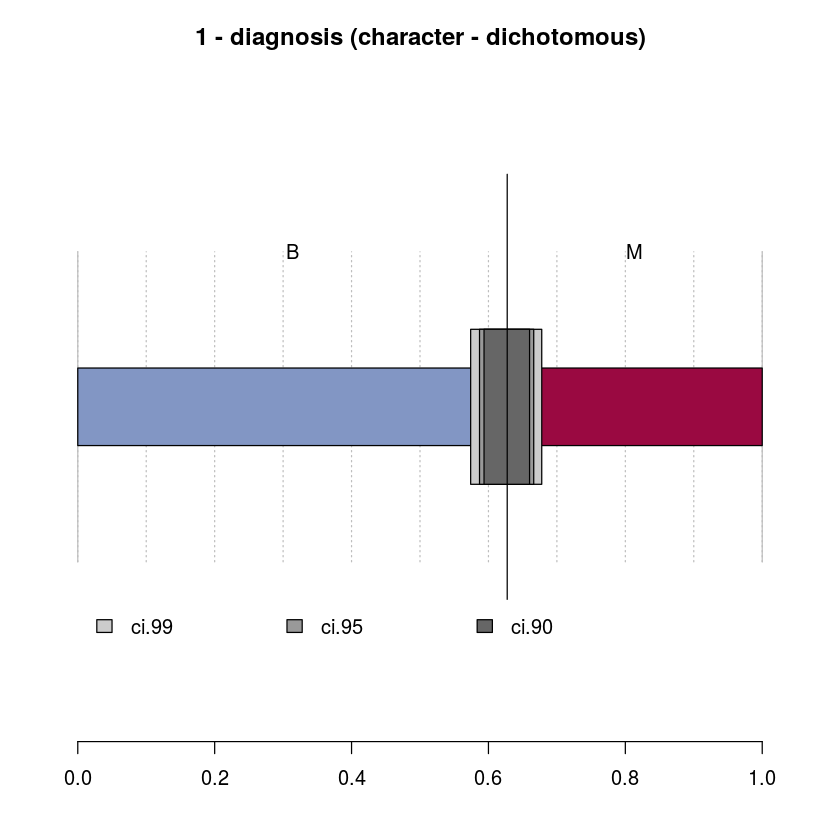

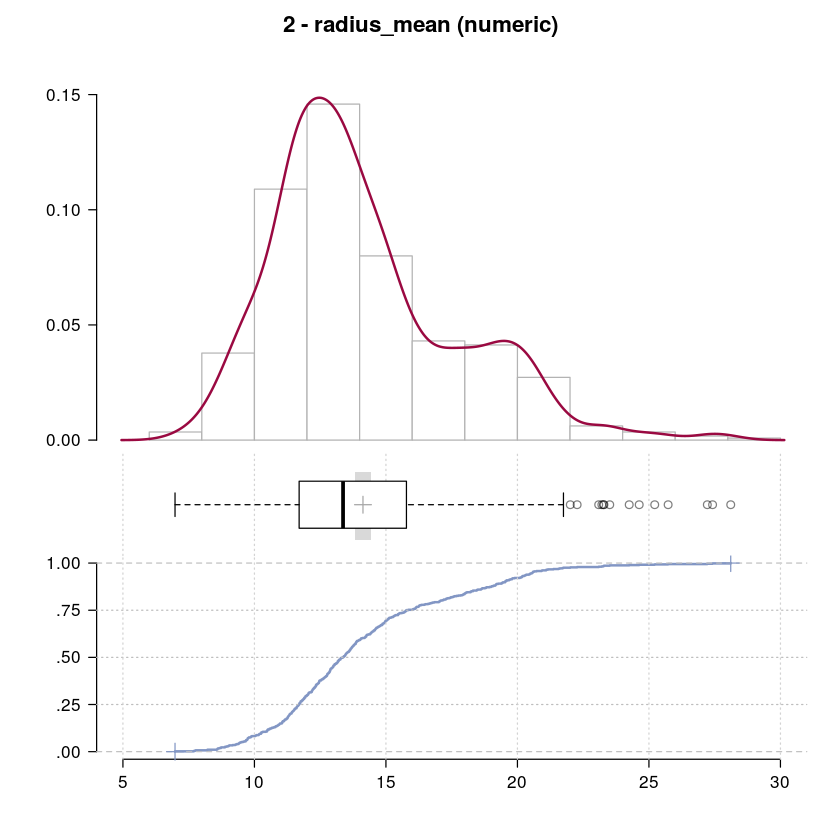

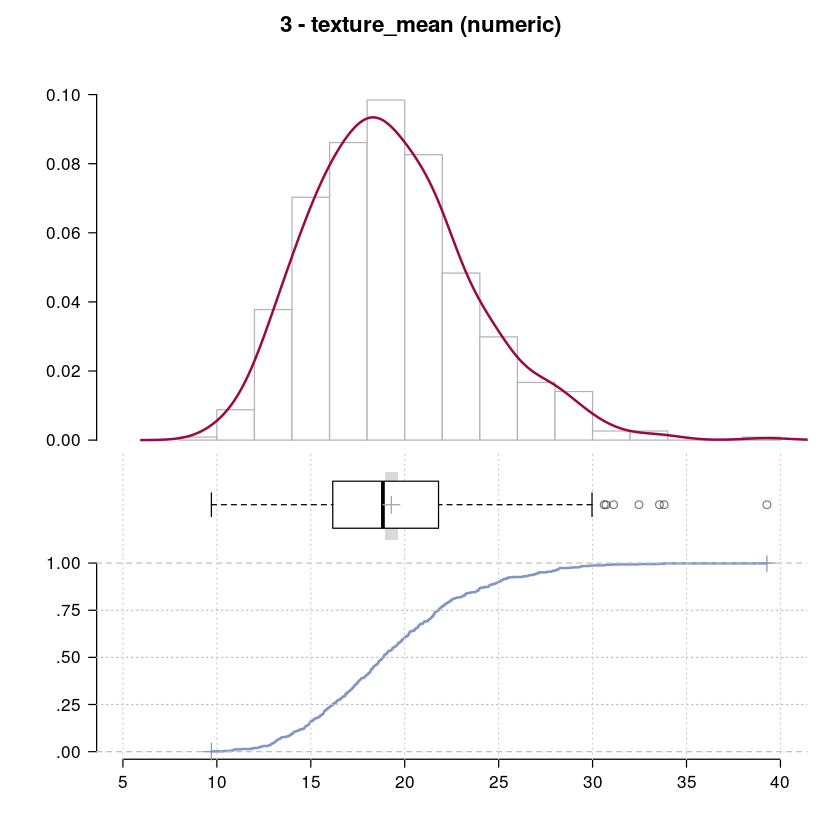

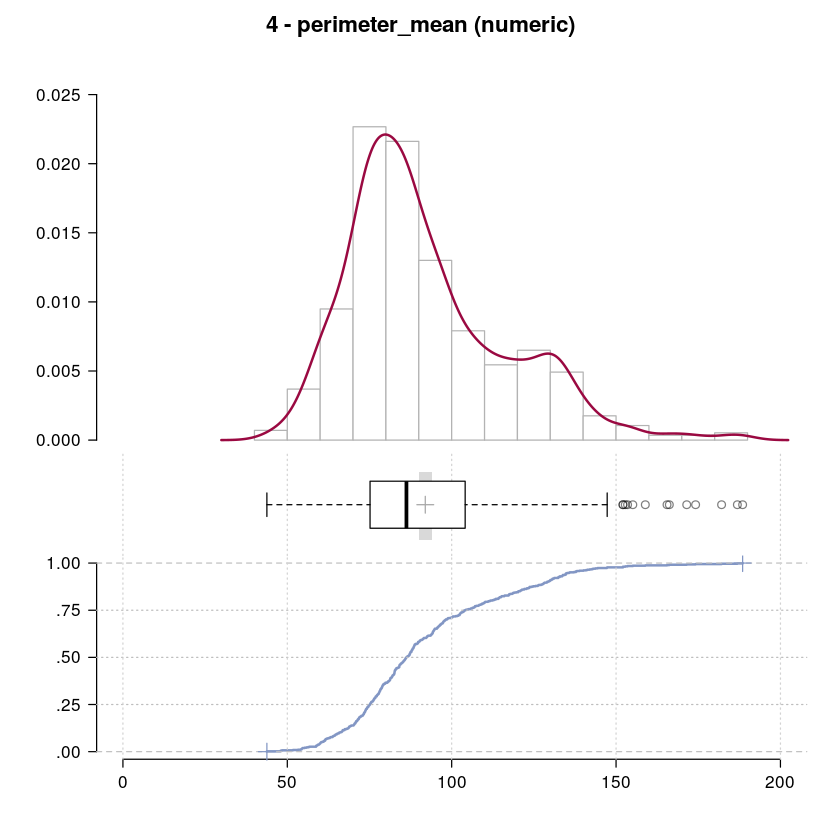

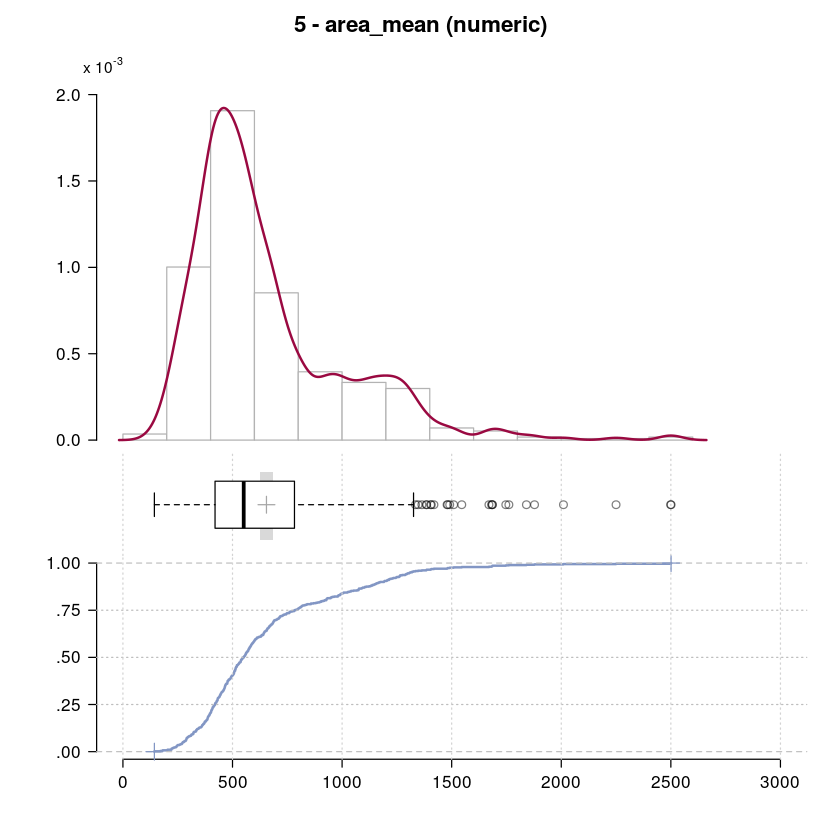

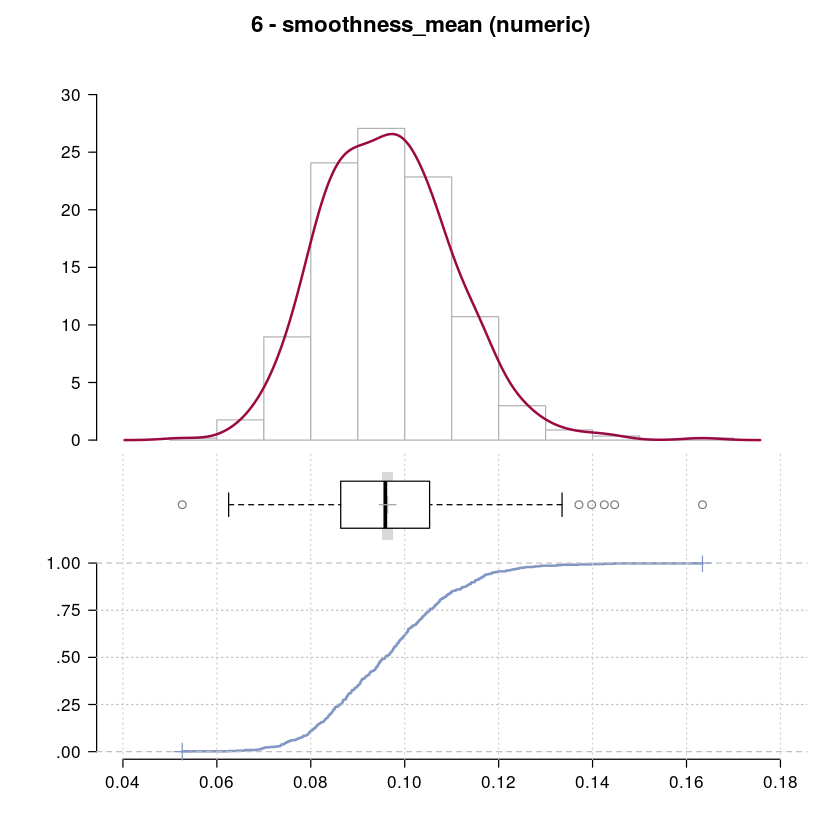

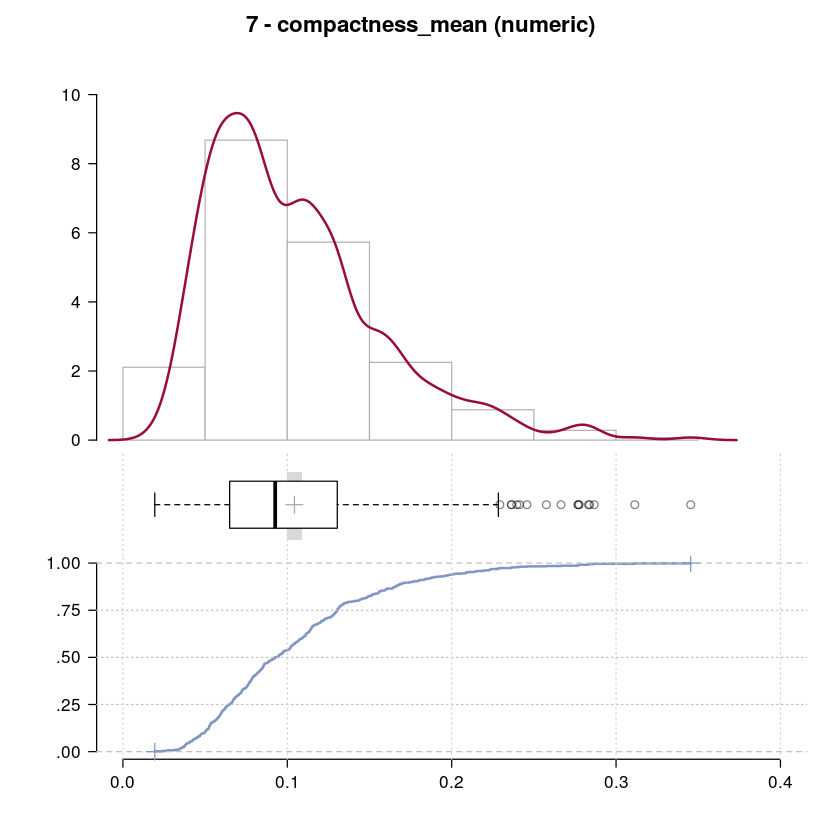

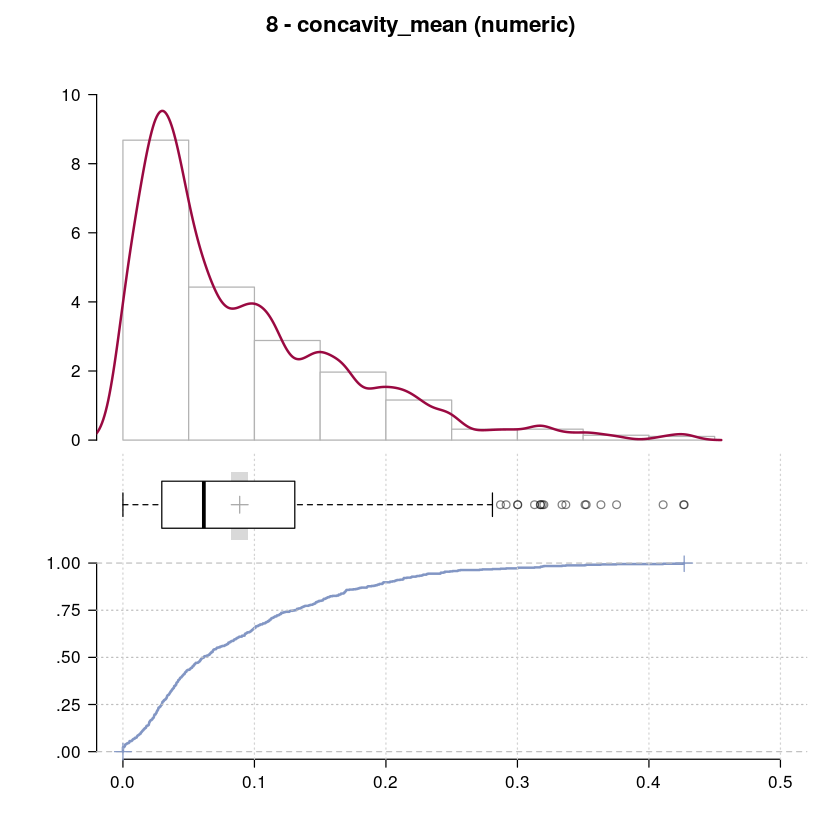

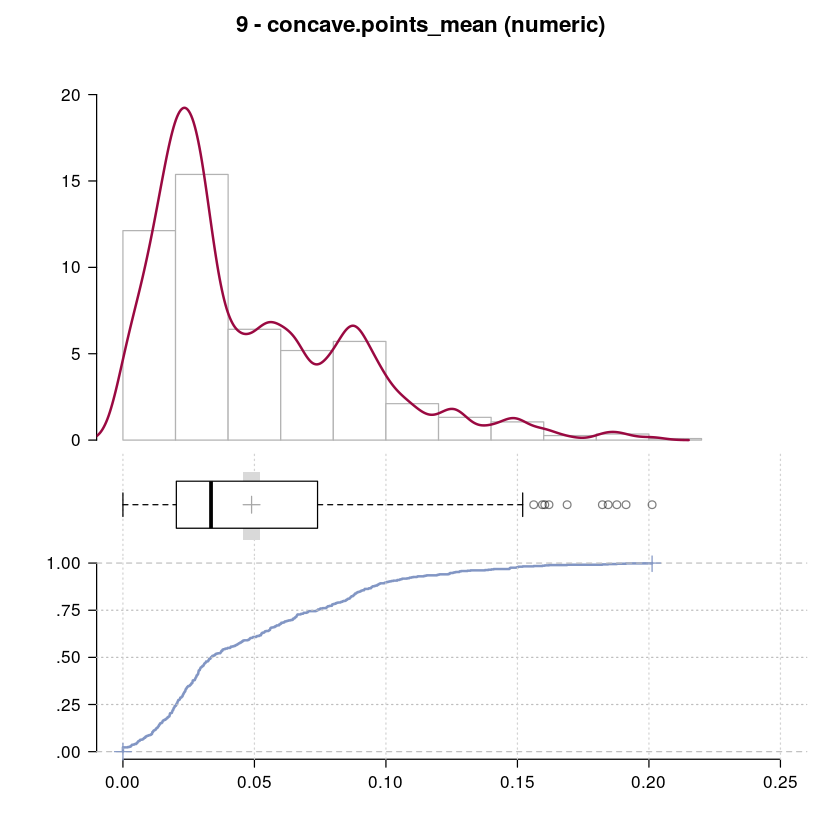

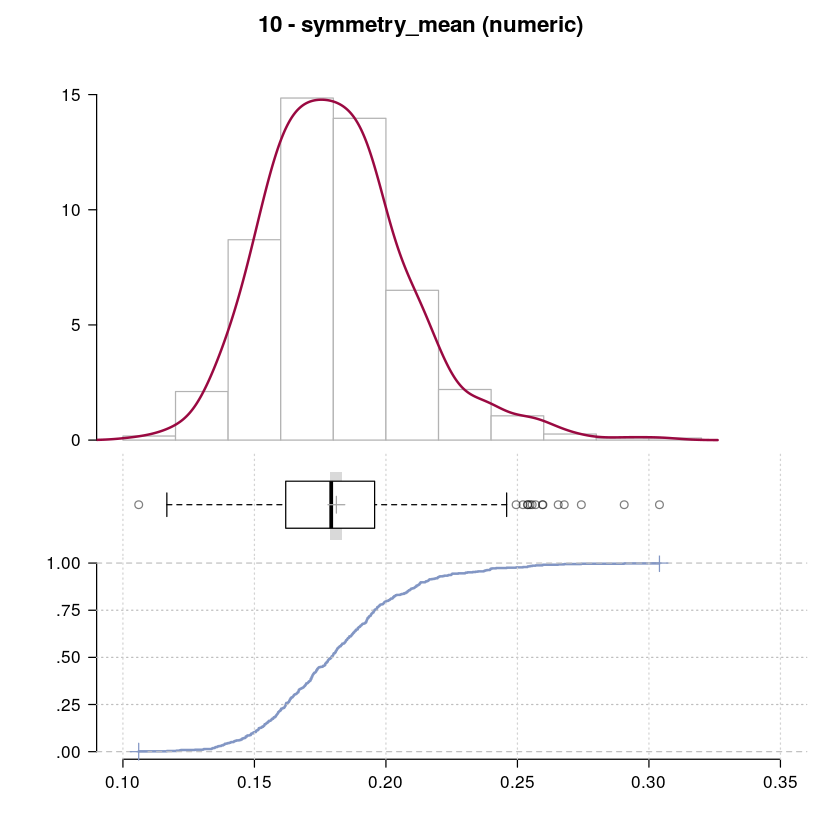

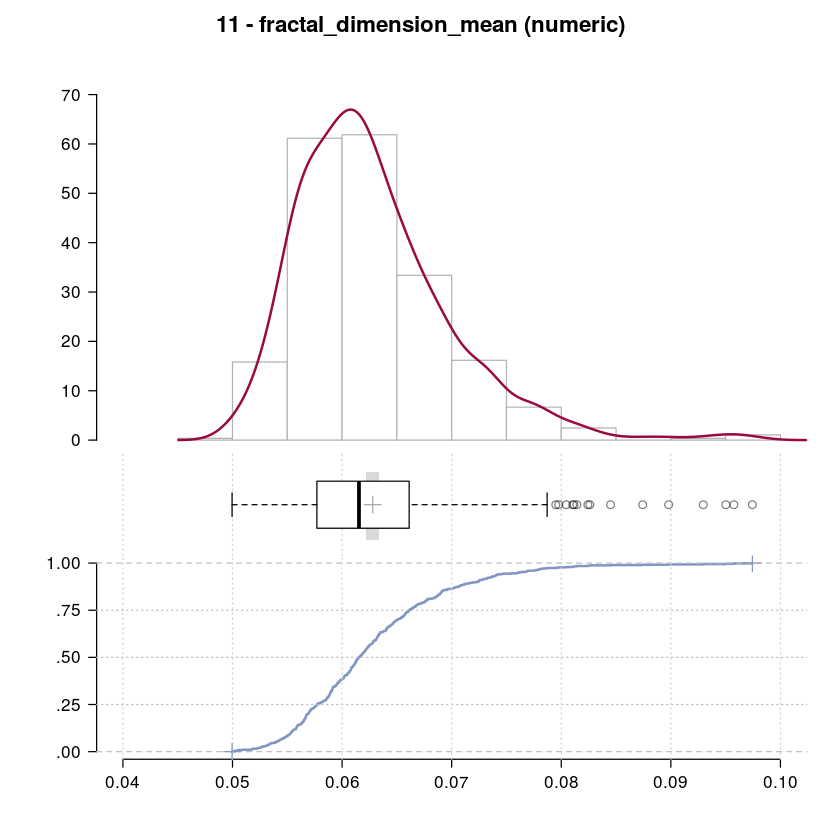

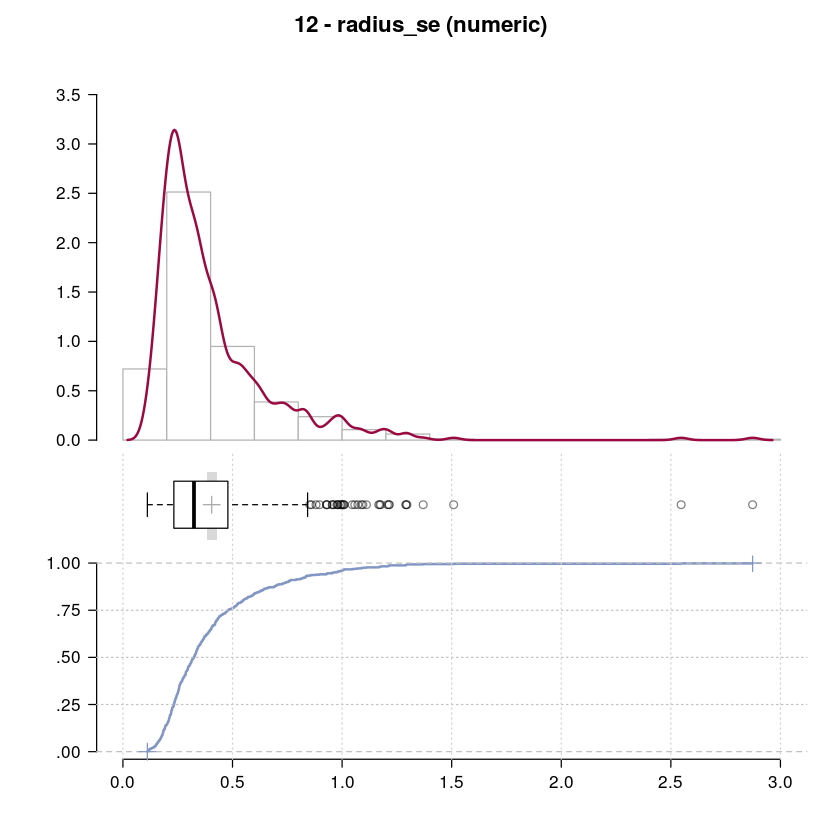

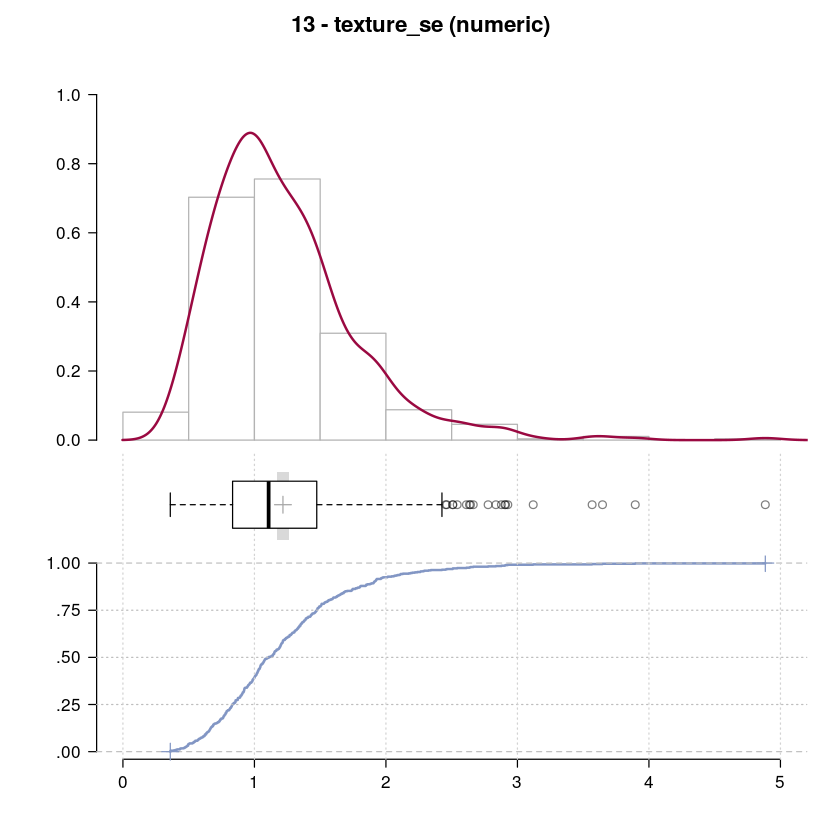

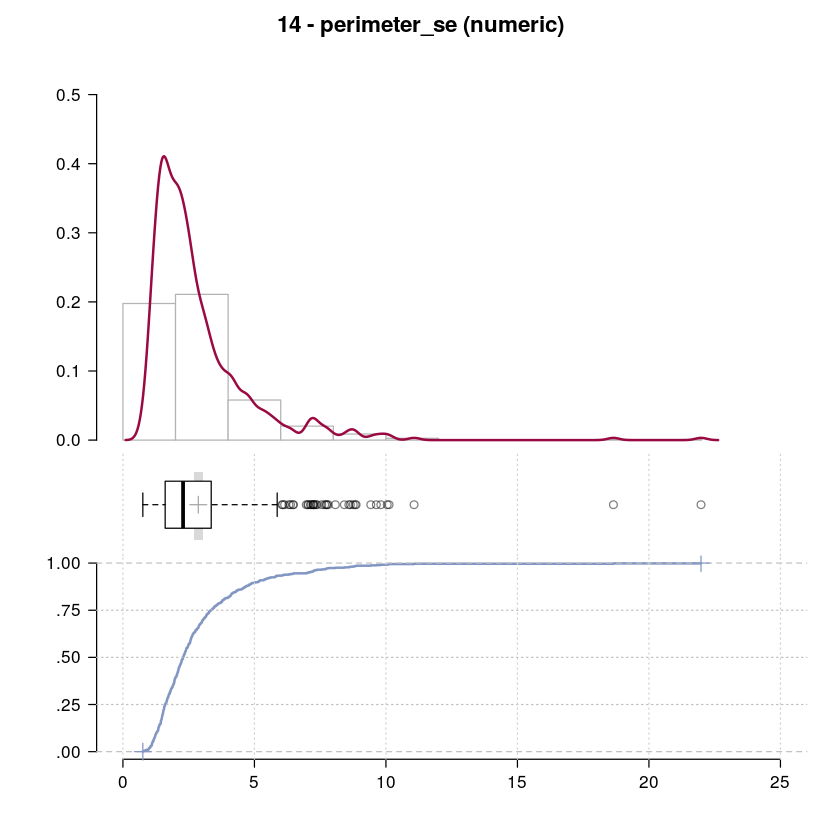

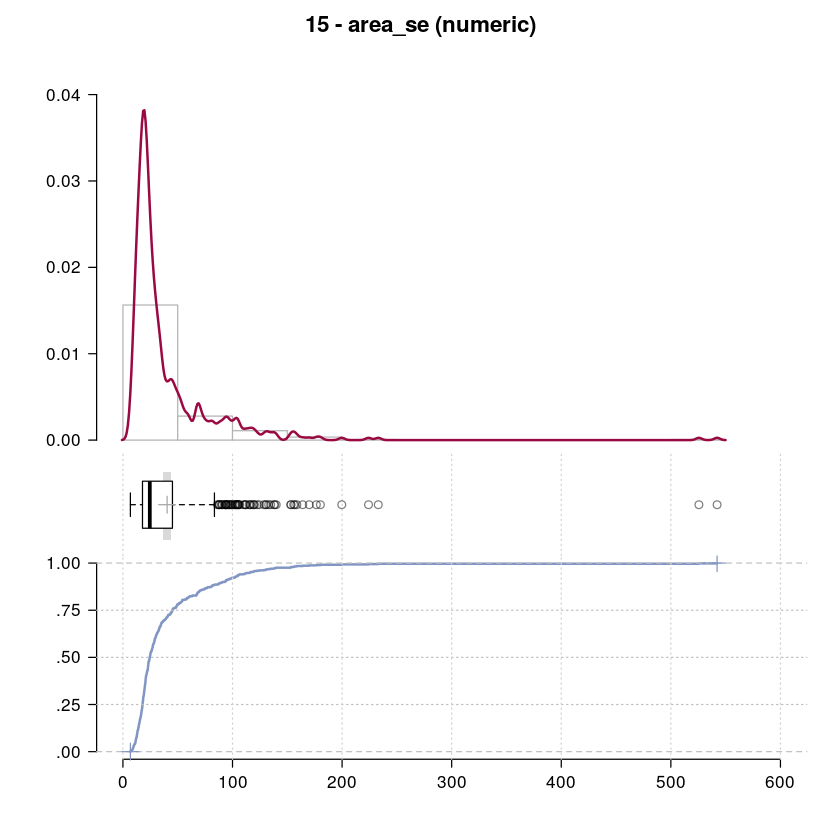

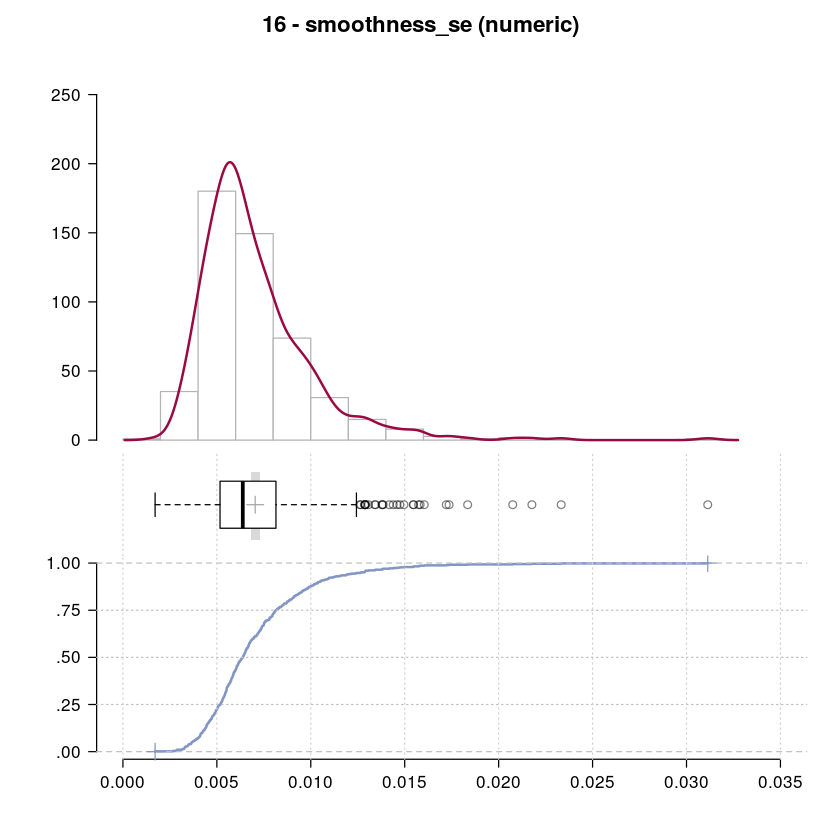

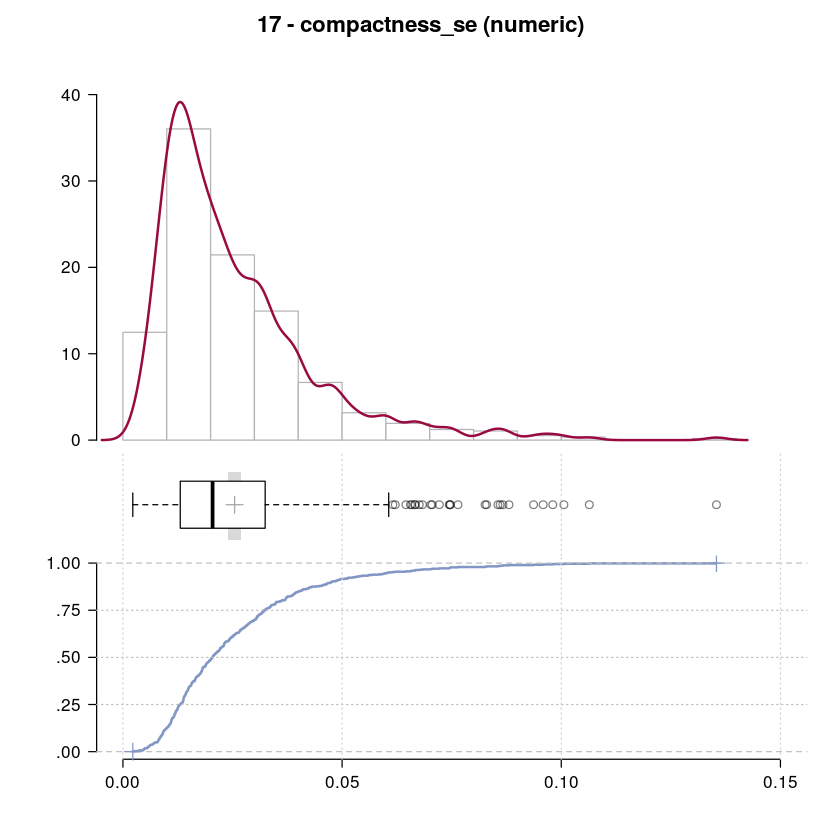

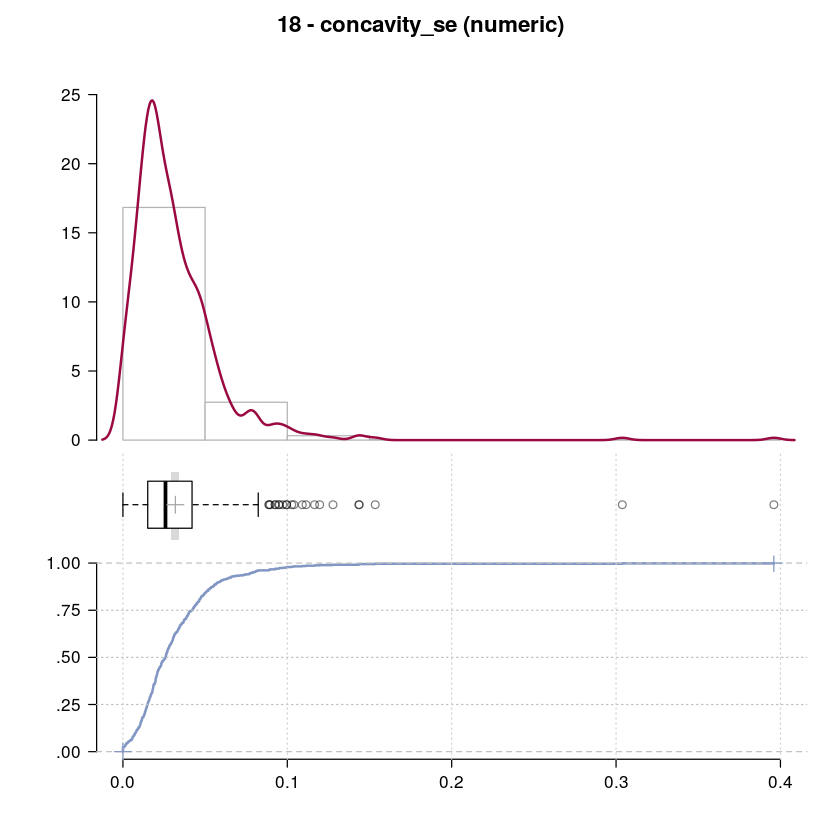

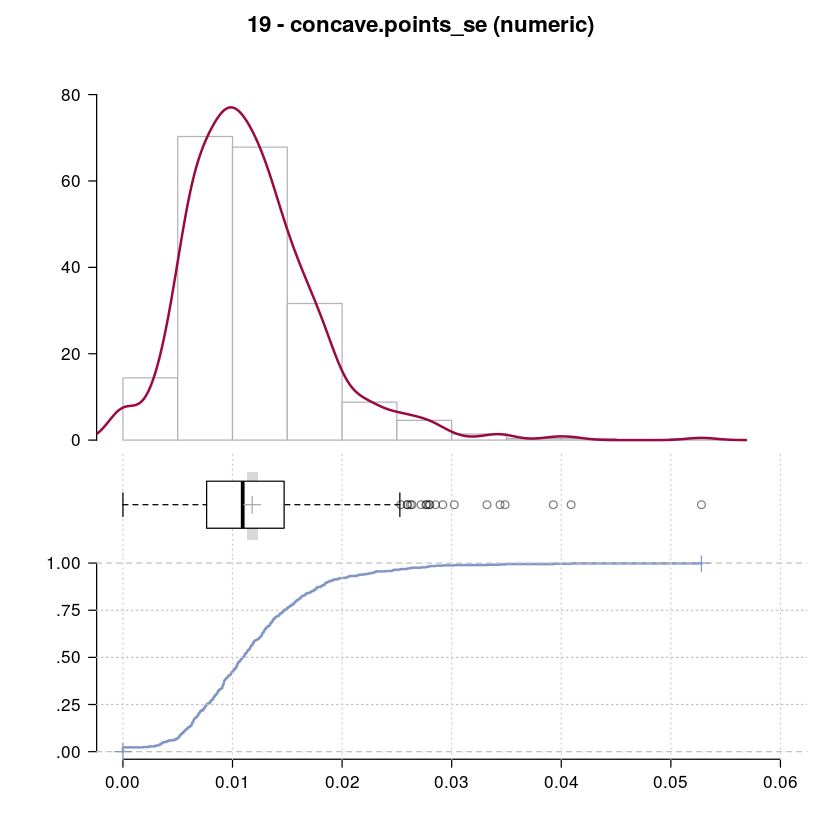

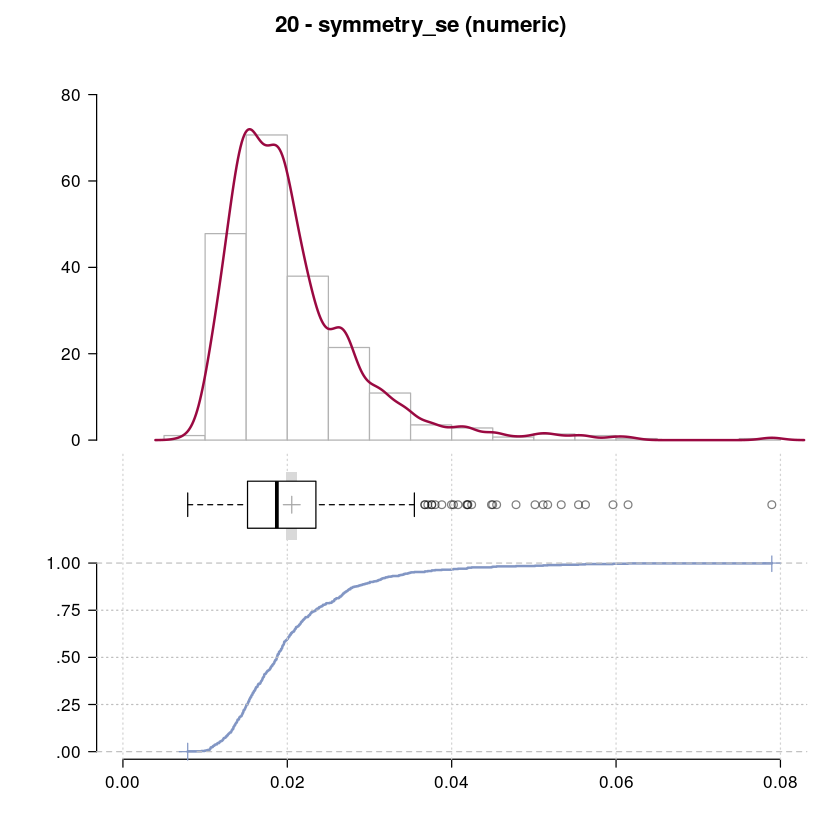

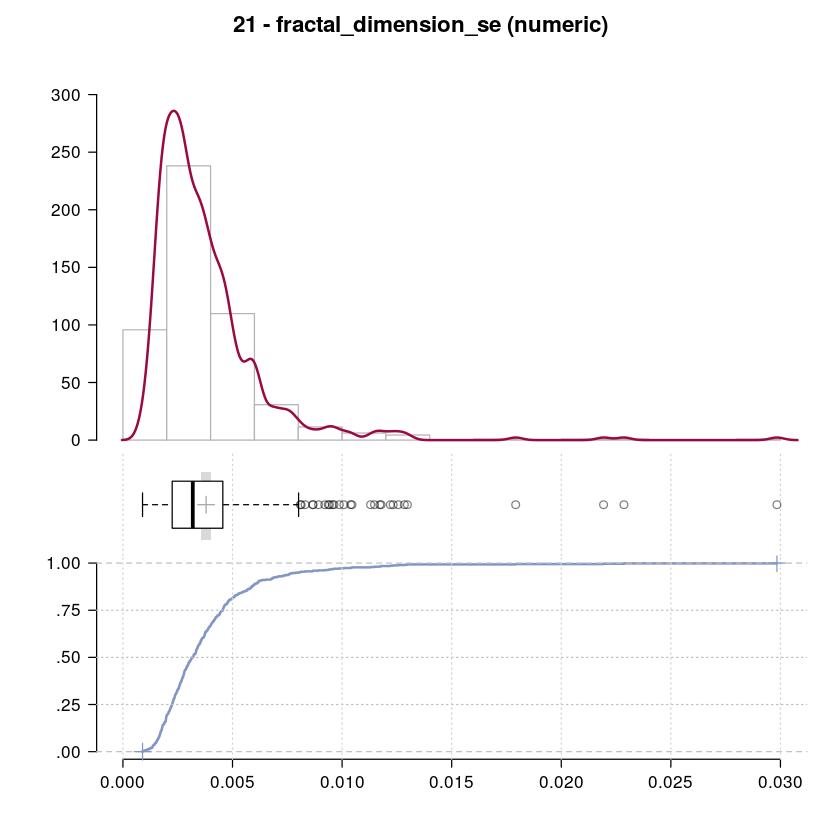

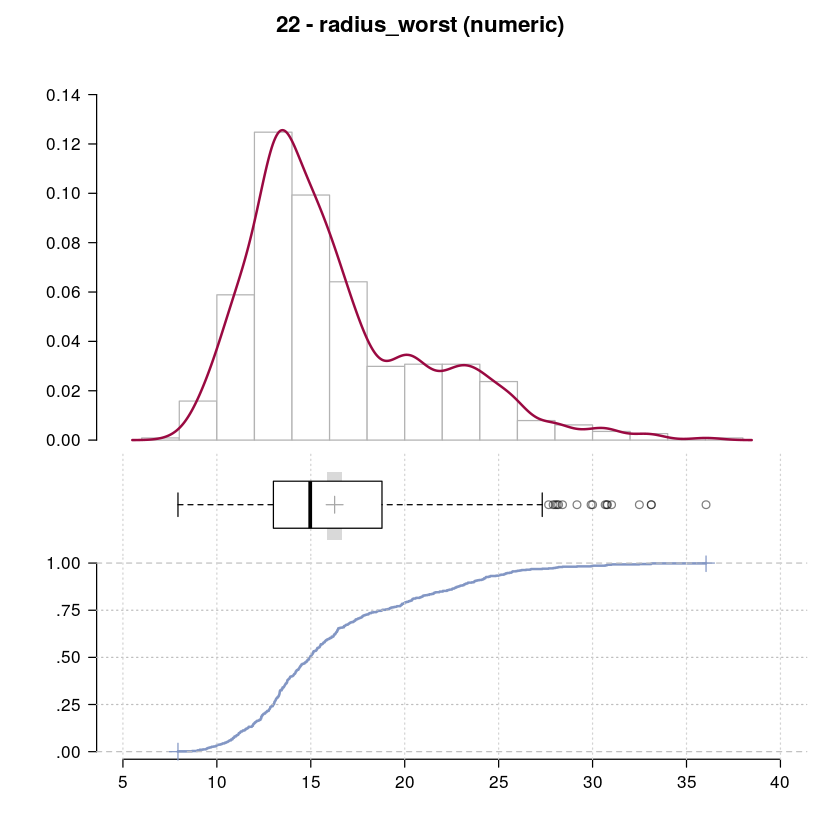

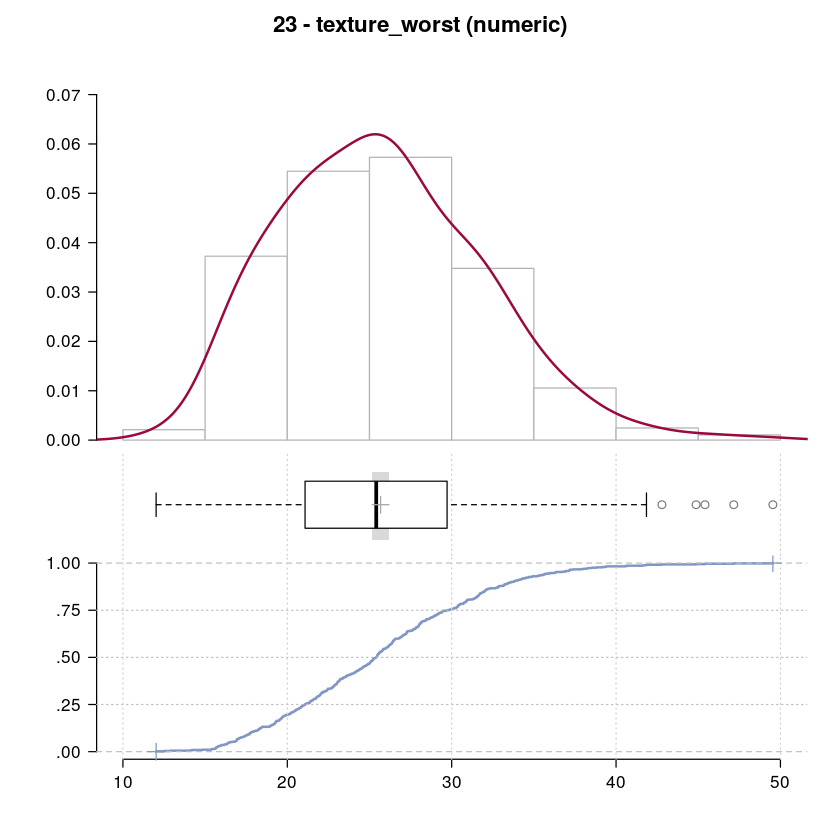

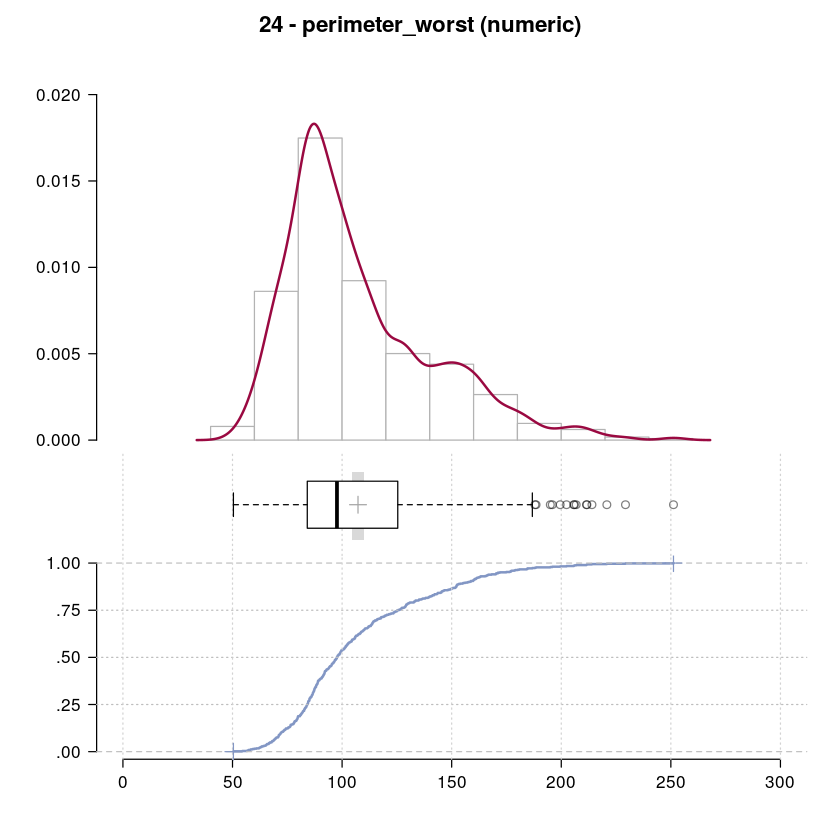

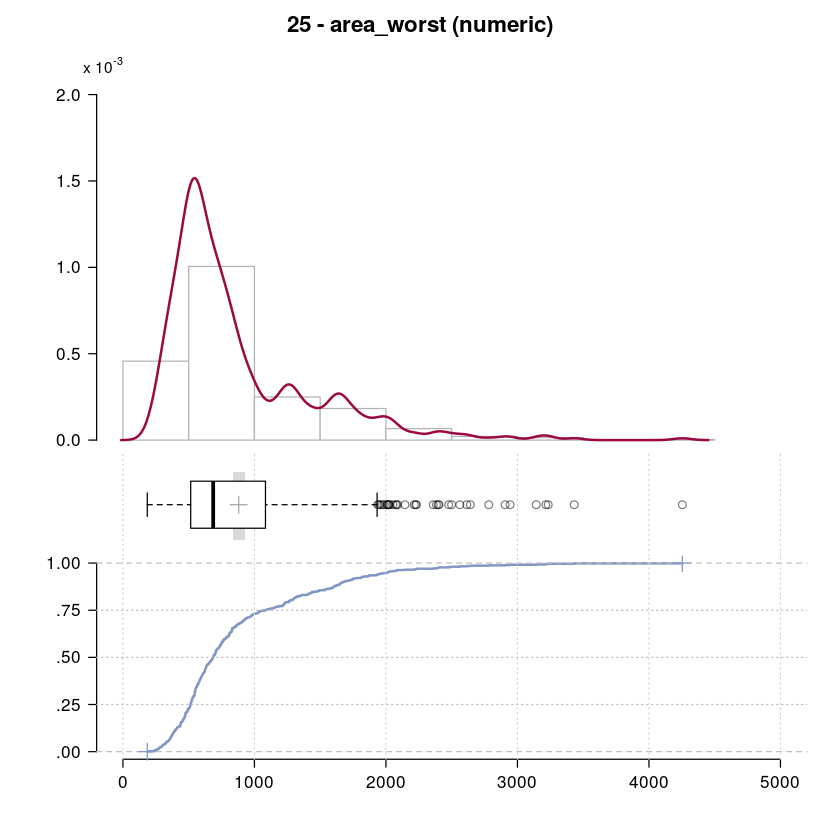

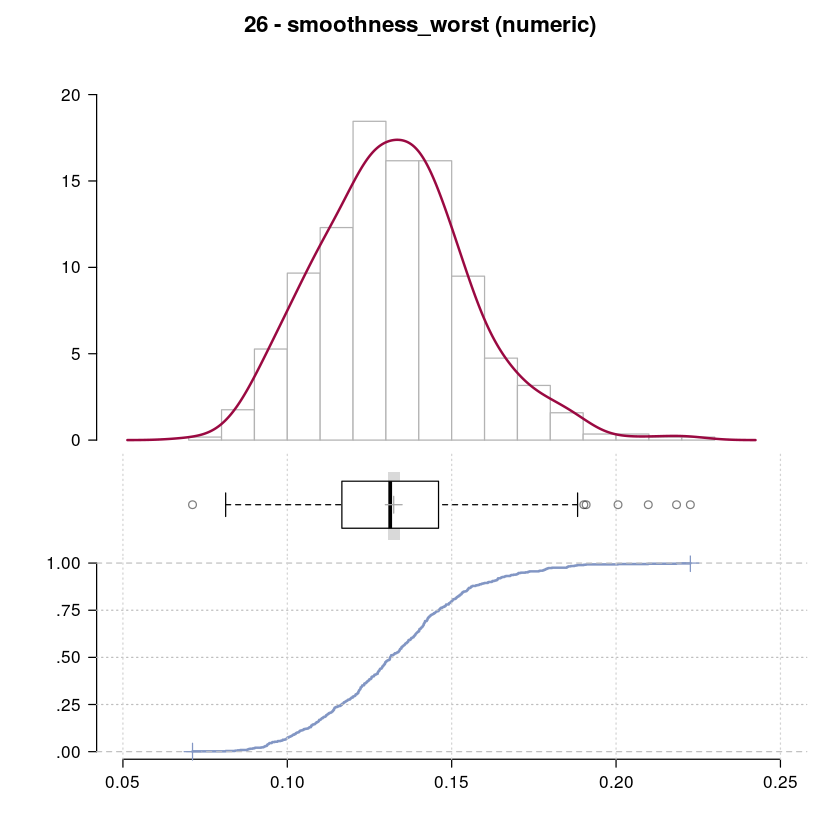

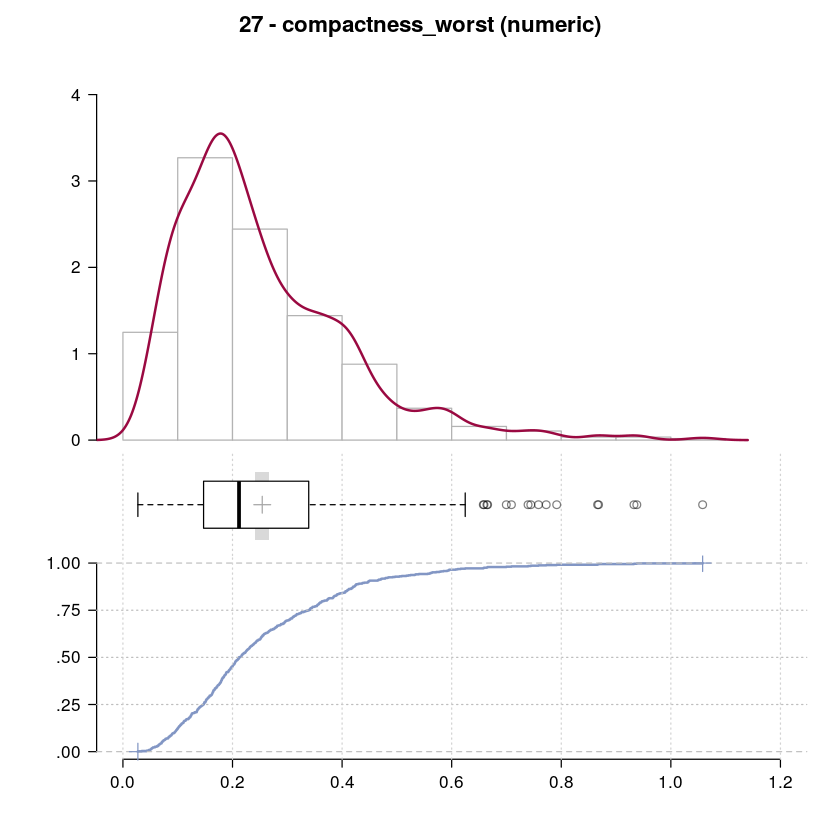

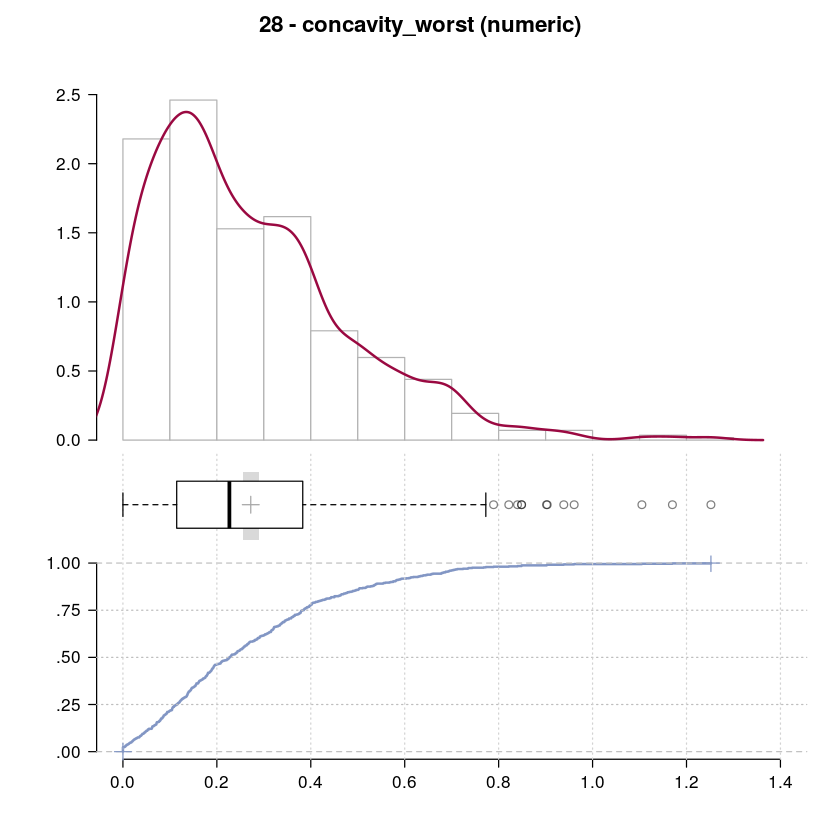

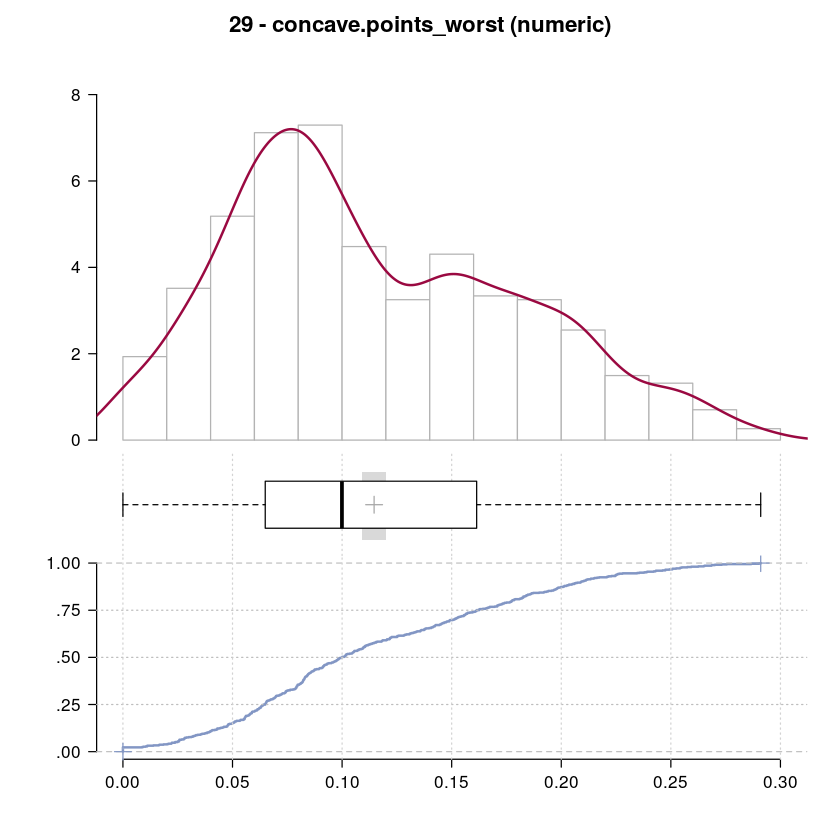

------------------------------------------------------------------------------ 
Describe breastc (data.frame):

data.frame:	569 obs. of  31 variables

  Nr  ColName                  Class      NAs  Levels
  1   diagnosis                character  .          
  2   radius_mean              numeric    .          
  3   texture_mean             numeric    .          
  4   perimeter_mean           numeric    .          
  5   area_mean                numeric    .          
  6   smoothness_mean          numeric    .          
  7   compactness_mean         numeric    .          
  8   concavity_mean           numeric    .          
  9   concave.points_mean      numeric    .          
  10  symmetry_mean            numeric    .          
  11  fractal_dimension_mean   numeric    .          
  12  radius_se                numeric    .          
  13  texture_se               numeric    .          
  14  perimeter_se             numeric    .          
  15  area_se                  numeric 

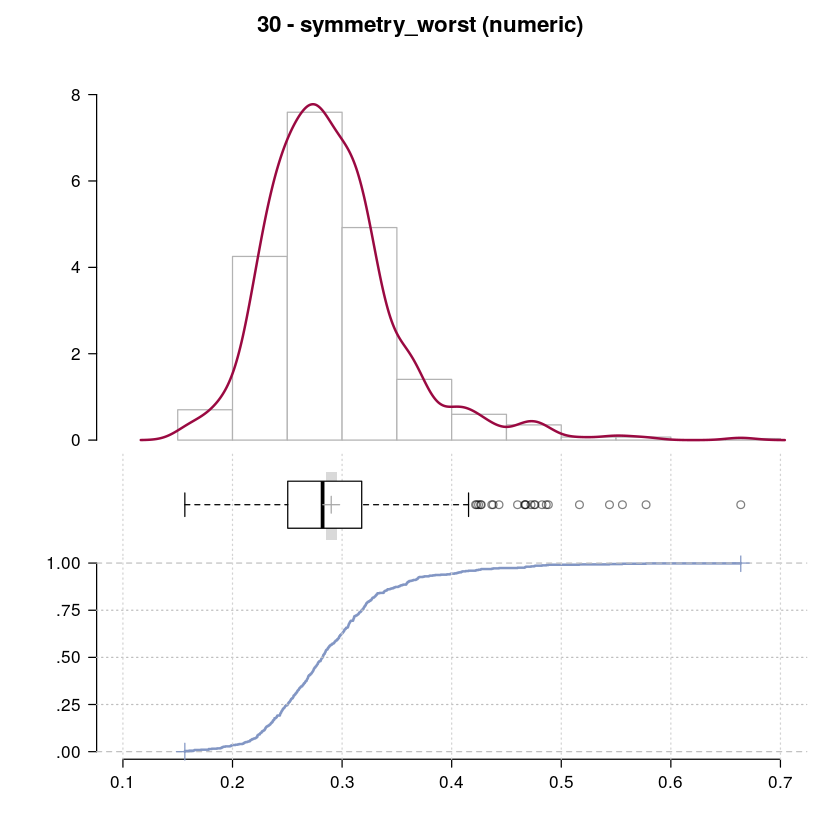

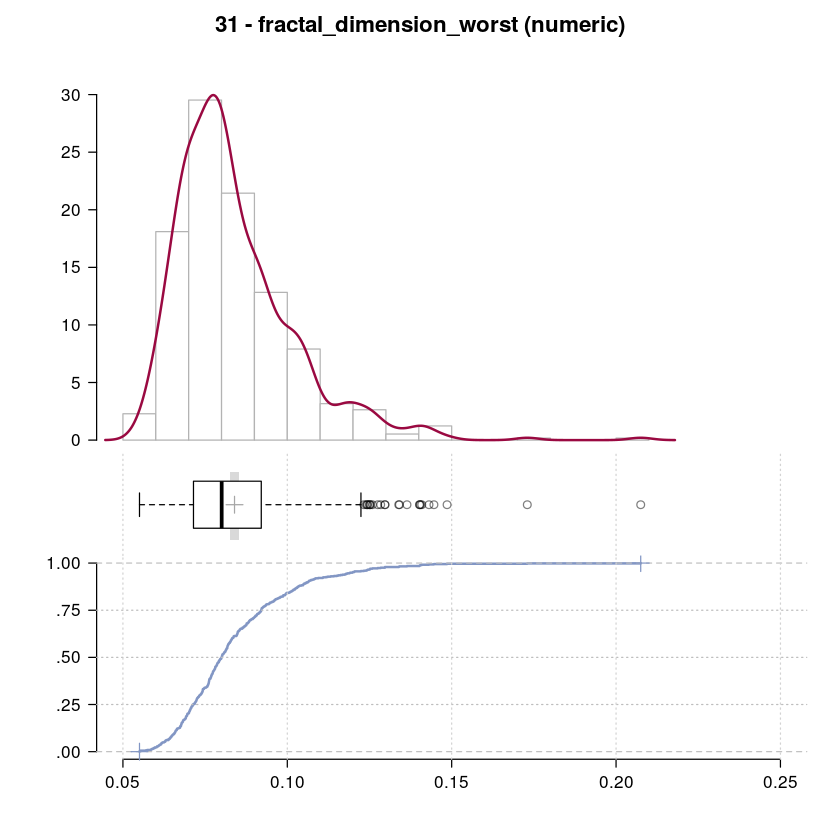

In [105]:
#sumário do dataset de trabalho
Desc(breastc)

### Ferramenta para estimar a distribuição de uma variável

summary statistics
------
min:  0.05504   max:  0.2075 
median:  0.08004 
mean:  0.08394582 
estimated sd:  0.01806127 
estimated skewness:  1.662579 
estimated kurtosis:  8.244611 

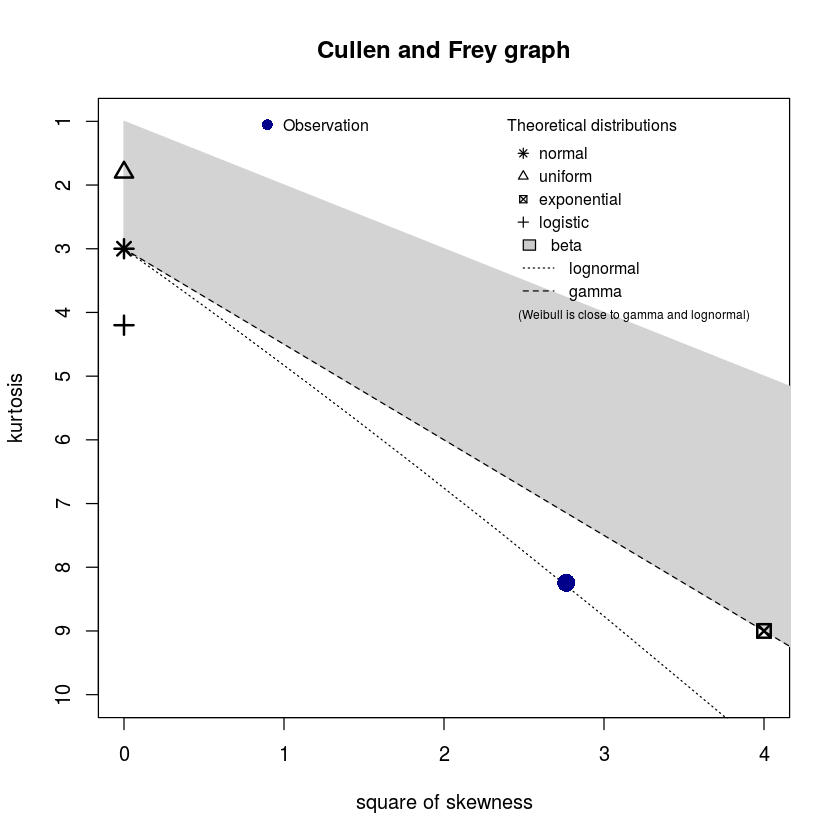

In [106]:
suppressMessages(library(fitdistrplus))
descdist(breastc$fractal_dimension_worst, discrete = FALSE)

### A distribuição que melhor "fita" a curva é a lognormal
#### skewness = assimetria, kurtosis = achatamento

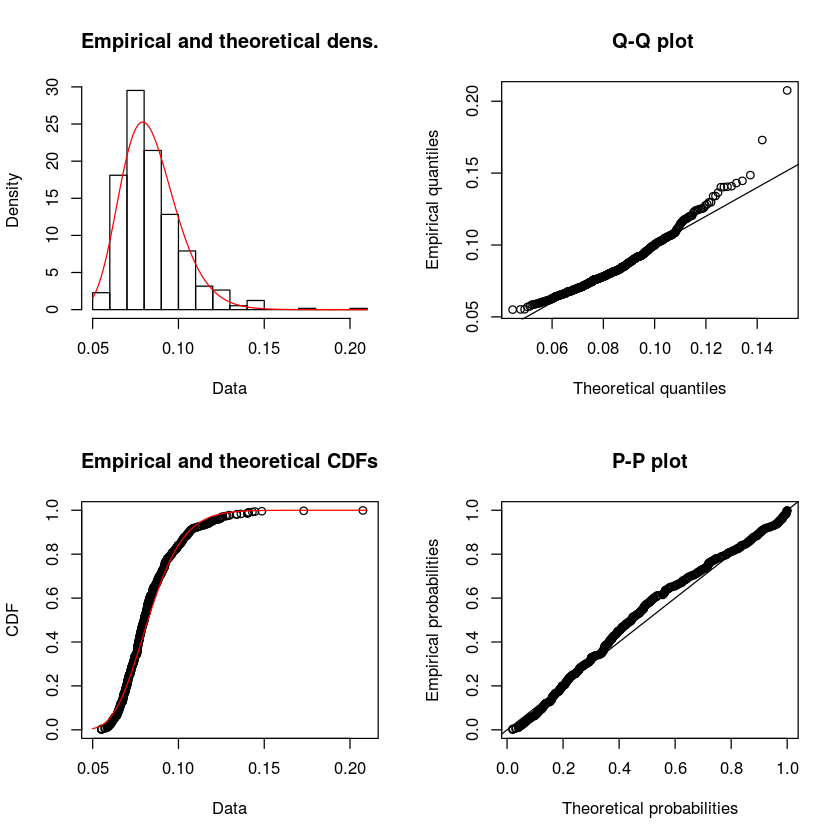

In [107]:
#Lognormal 
fit.dist <- fitdist(breastc$fractal_dimension_worst, "lnorm")
plot(fit.dist)

### Apenas removendo a coluna de diagnóstico para restar apenas dados numéricos
### Plot da correlação entre as variáveis através da distribuição dos dados

diagnosis radius_mean texture_mean perimeter_mean area_mean
842302   M         17.99       10.38        122.80         1001.0   
842517   M         20.57       17.77        132.90         1326.0   
84300903 M         19.69       21.25        130.00         1203.0   
84348301 M         11.42       20.38         77.58          386.1   
84358402 M         20.29       14.34        135.10         1297.0   
843786   M         12.45       15.70         82.57          477.1   
         smoothness_mean compactness_mean concavity_mean concave.points_mean
842302   0.11840         0.27760          0.3001         0.14710            
842517   0.08474         0.07864          0.0869         0.07017            
84300903 0.10960         0.15990          0.1974         0.12790            
84348301 0.14250         0.28390          0.2414         0.10520            
84358402 0.10030         0.13280          0.1980         0.10430            
843786   0.12780         0.17000          0.1578         0.08089            
         symmetry_mean ⋯ radius_worst texture_worst perimeter_worst area_worst
842302   0.2419        ⋯ 25.38        17.33         184.60          2019.0    
842517   0.1812        ⋯ 24.99        23.41         158.80          1956.0    
84300903 0.2069        ⋯ 23.57        25.53         152.50          1709.0    
84348301 0.2597        ⋯ 14.91        26.50          98.87           567.7    
84358402 0.1809        ⋯ 22.54        16.67         152.20          1575.0    
843786   0.2087        ⋯ 15.47        23.75         103.40           741.6    
         smoothness_worst compactness_worst concavity_worst
842302   0.1622           0.6656            0.7119         
842517   0.1238           0.1866            0.2416         
84300903 0.1444           0.4245            0.4504         
84348301 0.2098           0.8663            0.6869         
84358402 0.1374           0.2050            0.4000         
843786   0.1791           0.5249            0.5355         
         concave.points_worst symmetry_worst fractal_dimension_worst
842302   0.2654               0.4601         0.11890                
842517   0.1860               0.2750         0.08902                
84300903 0.2430               0.3613         0.08758                
84348301 0.2575               0.6638         0.17300                
84358402 0.1625               0.2364         0.07678                
843786   0.1741               0.3985         0.12440

radius_mean texture_mean perimeter_mean area_mean smoothness_mean
842302   17.99       10.38        122.80         1001.0    0.11840        
842517   20.57       17.77        132.90         1326.0    0.08474        
84300903 19.69       21.25        130.00         1203.0    0.10960        
84348301 11.42       20.38         77.58          386.1    0.14250        
84358402 20.29       14.34        135.10         1297.0    0.10030        
843786   12.45       15.70         82.57          477.1    0.12780        
         compactness_mean concavity_mean concave.points_mean symmetry_mean
842302   0.27760          0.3001         0.14710             0.2419       
842517   0.07864          0.0869         0.07017             0.1812       
84300903 0.15990          0.1974         0.12790             0.2069       
84348301 0.28390          0.2414         0.10520             0.2597       
84358402 0.13280          0.1980         0.10430             0.1809       
843786   0.17000          0.1578         0.08089             0.2087       
         fractal_dimension_mean ⋯ radius_worst texture_worst perimeter_worst
842302   0.07871                ⋯ 25.38        17.33         184.60         
842517   0.05667                ⋯ 24.99        23.41         158.80         
84300903 0.05999                ⋯ 23.57        25.53         152.50         
84348301 0.09744                ⋯ 14.91        26.50          98.87         
84358402 0.05883                ⋯ 22.54        16.67         152.20         
843786   0.07613                ⋯ 15.47        23.75         103.40         
         area_worst smoothness_worst compactness_worst concavity_worst
842302   2019.0     0.1622           0.6656            0.7119         
842517   1956.0     0.1238           0.1866            0.2416         
84300903 1709.0     0.1444           0.4245            0.4504         
84348301  567.7     0.2098           0.8663            0.6869         
84358402 1575.0     0.1374           0.2050            0.4000         
843786    741.6     0.1791           0.5249            0.5355         
         concave.points_worst symmetry_worst fractal_dimension_worst
842302   0.2654               0.4601         0.11890                
842517   0.1860               0.2750         0.08902                
84300903 0.2430               0.3613         0.08758                
84348301 0.2575               0.6638         0.17300                
84358402 0.1625               0.2364         0.07678                
843786   0.1741               0.3985         0.12440

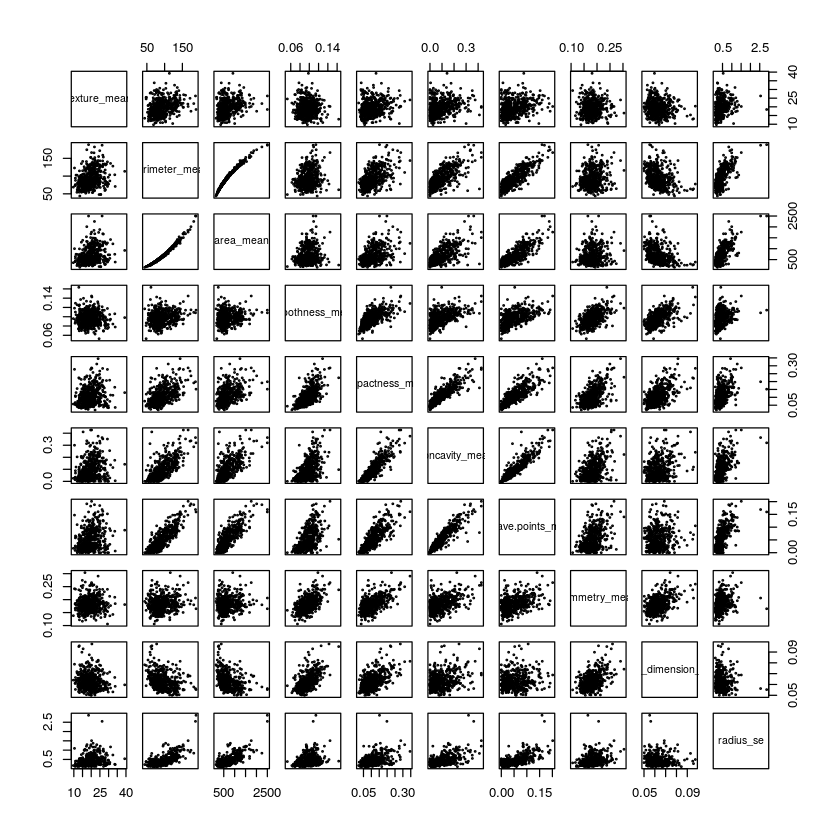

In [108]:
head(breastc)
breastc = subset(breastc, select = -c(1))
head(breastc)
pairs(breastc[2:11], cex=0.27)

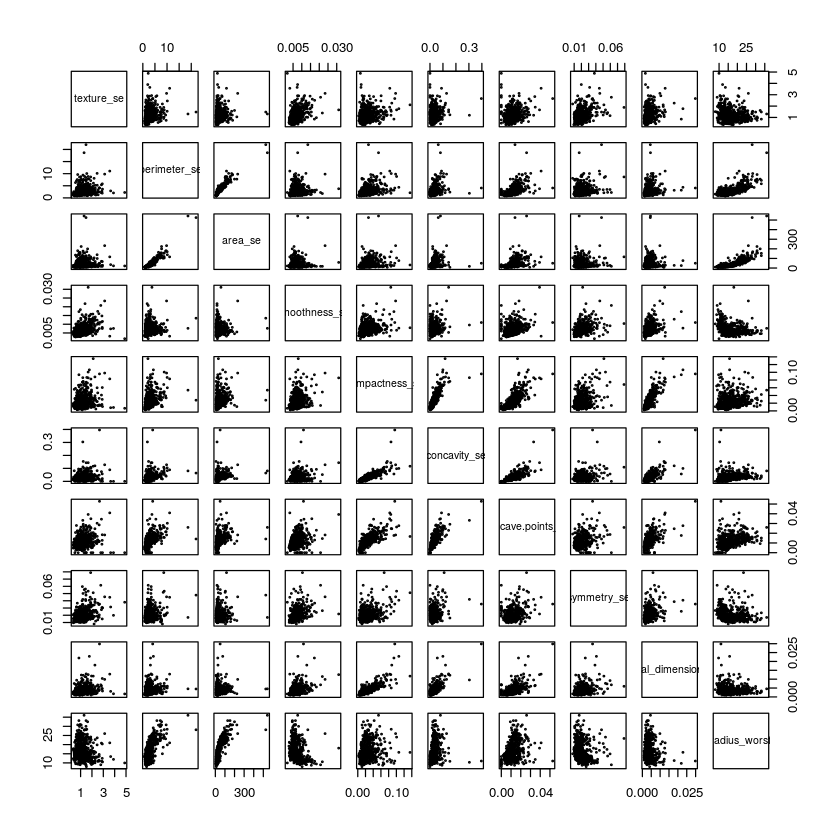

In [109]:
pairs(breastc[12:21], cex=0.27)

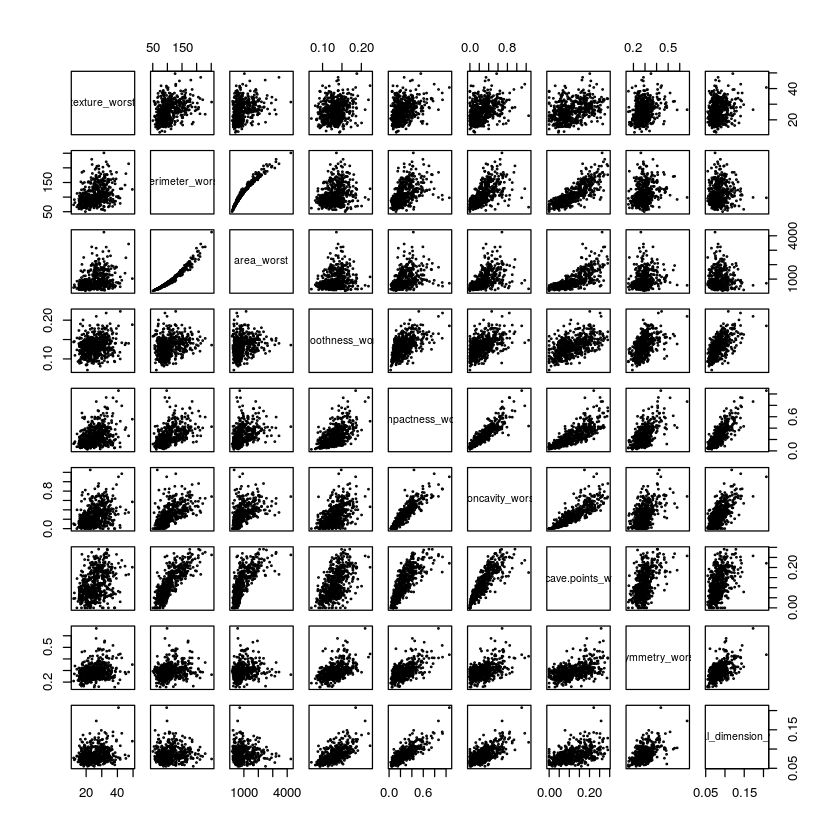

In [110]:
pairs(breastc[22:30], cex=0.27)

### Cálculo da matriz de correlação

In [111]:
# Gerando matriz de correlacao
suppressWarnings(library("psych"))
bc_corr = corr.test(breastc)
bc_corr$r

radius_mean  texture_mean perimeter_mean area_mean   
radius_mean              1.000000000  0.323781891  0.997855281    0.987357170
texture_mean             0.323781891  1.000000000  0.329533059    0.321085696
perimeter_mean           0.997855281  0.329533059  1.000000000    0.986506804
area_mean                0.987357170  0.321085696  0.986506804    1.000000000
smoothness_mean          0.170581187 -0.023388516  0.207278164    0.177028377
compactness_mean         0.506123578  0.236702222  0.556936211    0.498501682
concavity_mean           0.676763550  0.302417828  0.716135650    0.685982829
concave.points_mean      0.822528522  0.293464051  0.850977041    0.823268869
symmetry_mean            0.147741242  0.071400980  0.183027212    0.151293079
fractal_dimension_mean  -0.311630826 -0.076437183 -0.261476908   -0.283109812
radius_se                0.679090388  0.275868676  0.691765014    0.732562227
texture_se              -0.097317443  0.386357623 -0.086761078   -0.066280214
perimeter_se             0.674171616  0.281673115  0.693134890    0.726628328
area_se                  0.735863663  0.259844987  0.744982694    0.800085921
smoothness_se           -0.222600125  0.006613777 -0.202694026   -0.166776667
compactness_se           0.205999980  0.191974611  0.250743681    0.212582551
concavity_se             0.194203623  0.143293077  0.228082345    0.207660060
concave.points_se        0.376168956  0.163851025  0.407216916    0.372320282
symmetry_se             -0.104320881  0.009127168 -0.081629327   -0.072496588
fractal_dimension_se    -0.042641269  0.054457520 -0.005523391   -0.019886963
radius_worst             0.969538973  0.352572947  0.969476363    0.962746086
texture_worst            0.297007644  0.912044589  0.303038372    0.287488627
perimeter_worst          0.965136514  0.358039575  0.970386887    0.959119574
area_worst               0.941082460  0.343545947  0.941549808    0.959213326
smoothness_worst         0.119616140  0.077503359  0.150549404    0.123522939
compactness_worst        0.413462823  0.277829592  0.455774228    0.390410309
concavity_worst          0.526911462  0.301025224  0.563879263    0.512605920
concave.points_worst     0.744214198  0.295315843  0.771240789    0.722016626
symmetry_worst           0.163953335  0.105007910  0.189115040    0.143569914
fractal_dimension_worst  0.007065886  0.119205351  0.051018530    0.003737597
                        smoothness_mean compactness_mean concavity_mean
radius_mean              0.17058119     0.50612358       0.67676355    
texture_mean            -0.02338852     0.23670222       0.30241783    
perimeter_mean           0.20727816     0.55693621       0.71613565    
area_mean                0.17702838     0.49850168       0.68598283    
smoothness_mean          1.00000000     0.65912322       0.52198377    
compactness_mean         0.65912322     1.00000000       0.88312067    
concavity_mean           0.52198377     0.88312067       1.00000000    
concave.points_mean      0.55369517     0.83113504       0.92139103    
symmetry_mean            0.55777479     0.60264105       0.50066662    
fractal_dimension_mean   0.58479200     0.56536866       0.33678336    
radius_se                0.30146710     0.49747345       0.63192482    
texture_se               0.06840645     0.04620483       0.07621835    
perimeter_se             0.29609193     0.54890526       0.66039079    
area_se                  0.24655243     0.45565285       0.61742681    
smoothness_se            0.33237544     0.13529927       0.09856375    
compactness_se           0.31894330     0.73872179       0.67027882    
concavity_se             0.24839568     0.57051687       0.69127021    
concave.points_se        0.38067569     0.64226185       0.68325992    
symmetry_se              0.20077438     0.22997659       0.17800921    
fractal_dimension_se     0.28360670     0.50731813       0.44930075    
radius_worst             0.21312014     0.53531540       0.68823641    
texture_worst         

### Outras formas de visualizar a correlação entre as variáveis

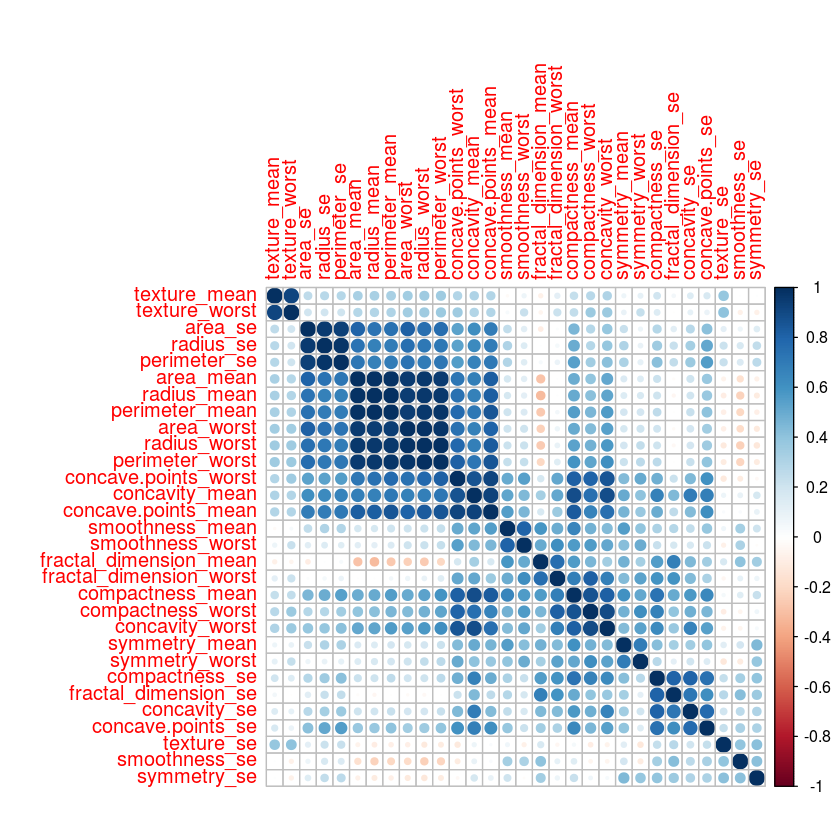

In [112]:
corMatMy <- bc_corr$r
corrplot(corMatMy, order = "hclust")

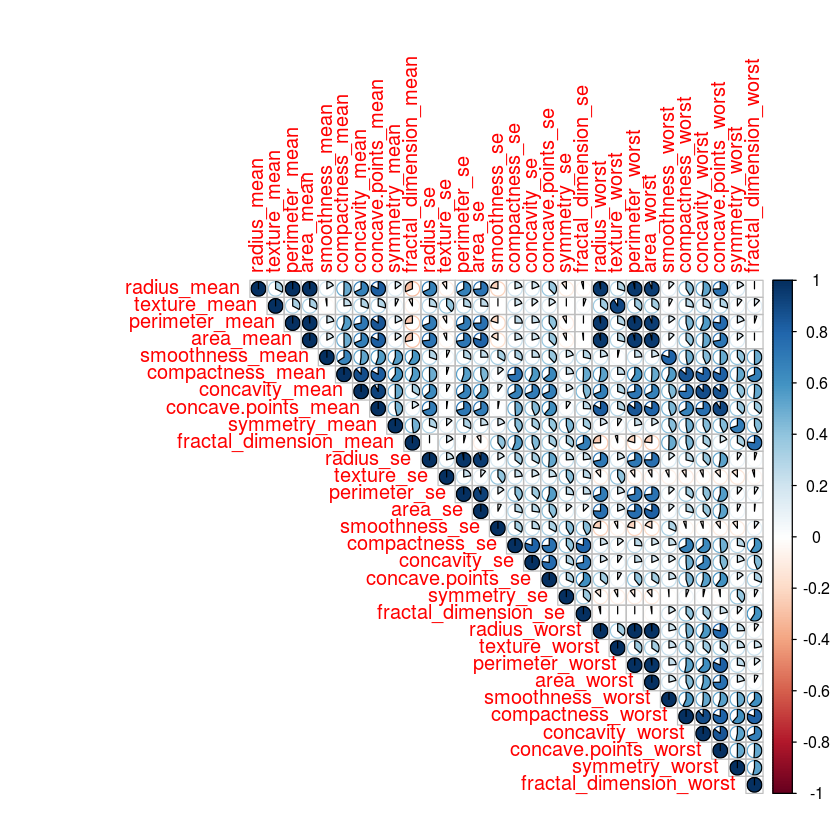

In [113]:
# Plot da análise da correlação # Plot da 
corrplot(bc_corr$r, method="pie", type="upper")

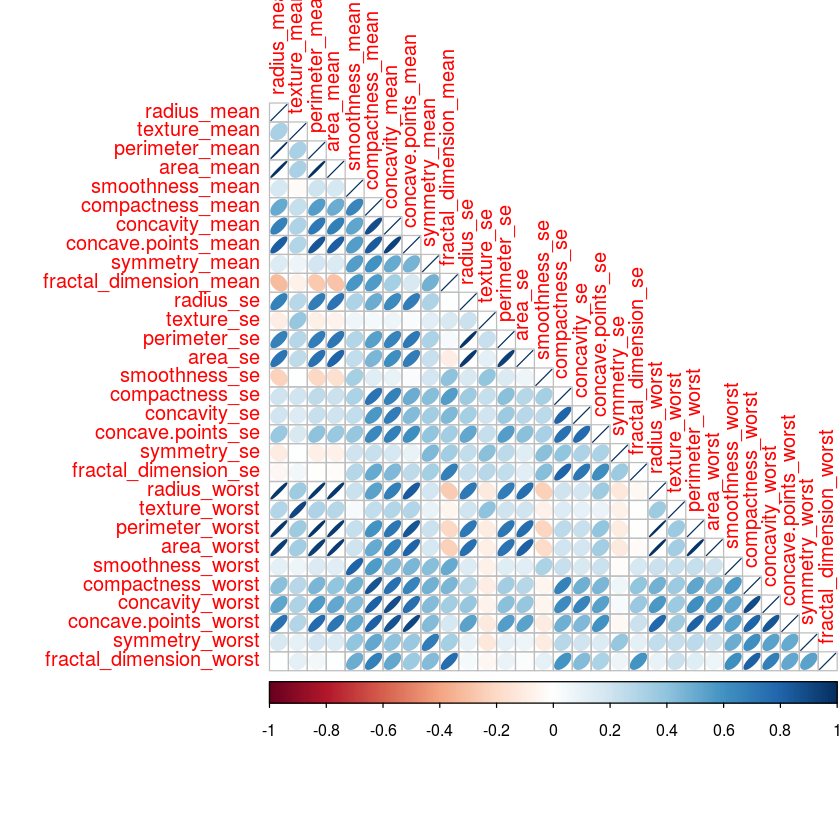

In [114]:
corrplot(bc_corr$r, method="ellipse", type="lower")

# Cálculo do PCA

- **X:** a data frame. Rows are individuals and columns are numeric variables
- **scale.unit:** a logical value. If TRUE, the data are scaled to unit variance before the analysis. This standardization to the same scale avoids some variables to become dominant just because of their large measurement units. It makes variable comparable.
- **ncp:** number of dimensions kept in the final results.
- **graph:** a logical value. If TRUE a graph is displayed.

In [115]:
bc.pca <- PCA(breastc, graph = TRUE, scale.unit = TRUE)

In [116]:
summary(bc.pca)


Call:
PCA(X = breastc, scale.unit = TRUE, graph = TRUE) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance              13.282   5.691   2.818   1.981   1.649   1.207   0.675
% of var.             44.272  18.971   9.393   6.602   5.496   4.025   2.251
Cumulative % of var.  44.272  63.243  72.636  79.239  84.734  88.759  91.010
                       Dim.8   Dim.9  Dim.10  Dim.11  Dim.12  Dim.13  Dim.14
Variance               0.477   0.417   0.351   0.294   0.261   0.241   0.157
% of var.              1.589   1.390   1.169   0.980   0.871   0.805   0.523
Cumulative % of var.  92.598  93.988  95.157  96.137  97.007  97.812  98.335
                      Dim.15  Dim.16  Dim.17  Dim.18  Dim.19  Dim.20  Dim.21
Variance               0.094   0.080   0.059   0.053   0.049   0.031   0.030
% of var.              0.314   0.266   0.198   0.175   0.165   0.104   0.100
Cumulative % of var.  98.649  98.915  99.113  99.288  99.453  99.557  99.657
    

### Autovalores das Dimensões geradas

Os autovalores das dimensões carregam a informação de variabilidade. Quanto maior o autovalor, maior a variabilidade da dimensão e, consequentemente, maior sua relevância.

### Como avaliar quantas dimensões considerar?

- Um autovalor > 1 indica que essa dimensão possui mais variância que uma das variáveis originais. Válido apenas para dados normalizados

- Definir um critério para a porcentagem de variância representada pelas dimensões.

In [117]:
eig.val <- get_eigenvalue(bc.pca)
eig.val

eigenvalue   variance.percent cumulative.variance.percent
Dim.1  1.328161e+01 4.427203e+01      44.27203                  
Dim.2  5.691355e+00 1.897118e+01      63.24321                  
Dim.3  2.817949e+00 9.393163e+00      72.63637                  
Dim.4  1.980640e+00 6.602135e+00      79.23851                  
Dim.5  1.648731e+00 5.495768e+00      84.73427                  
Dim.6  1.207357e+00 4.024522e+00      88.75880                  
Dim.7  6.752201e-01 2.250734e+00      91.00953                  
Dim.8  4.766171e-01 1.588724e+00      92.59825                  
Dim.9  4.168948e-01 1.389649e+00      93.98790                  
Dim.10 3.506935e-01 1.168978e+00      95.15688                  
Dim.11 2.939157e-01 9.797190e-01      96.13660                  
Dim.12 2.611614e-01 8.705379e-01      97.00714                  
Dim.13 2.413575e-01 8.045250e-01      97.81166                  
Dim.14 1.570097e-01 5.233657e-01      98.33503                  
Dim.15 9.413497e-02 3.137832e-01      98.64881                  
Dim.16 7.986280e-02 2.662093e-01      98.91502                  
Dim.17 5.939904e-02 1.979968e-01      99.11302                  
Dim.18 5.261878e-02 1.753959e-01      99.28841                  
Dim.19 4.947759e-02 1.649253e-01      99.45334                  
Dim.20 3.115940e-02 1.038647e-01      99.55720                  
Dim.21 2.997289e-02 9.990965e-02      99.65711                  
Dim.22 2.743940e-02 9.146468e-02      99.74858                  
Dim.23 2.434084e-02 8.113613e-02      99.82971                  
Dim.24 1.805501e-02 6.018336e-02      99.88990                  
Dim.25 1.548127e-02 5.160424e-02      99.94150                  
Dim.26 8.177640e-03 2.725880e-02      99.96876                  
Dim.27 6.900464e-03 2.300155e-02      99.99176                  
Dim.28 1.589338e-03 5.297793e-03      99.99706                  
Dim.29 7.488031e-04 2.496010e-03      99.99956                  
Dim.30 1.330448e-04 4.434827e-04     100.00000

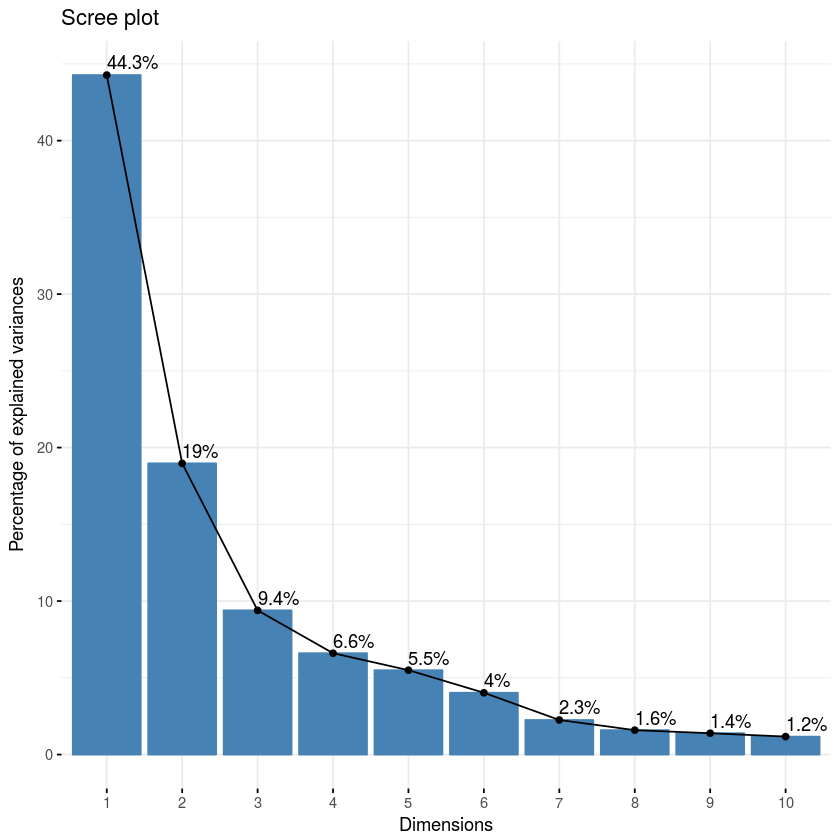

In [118]:
fviz_screeplot(bc.pca, addlabels = TRUE)

### A qualidade da representação das variáveis no factor map é chamada de cos2
var$cos2: represents the quality of representation for variables on the factor map. It’s calculated as the squared coordinates: var.cos2 = var.coord * var.coord.

Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

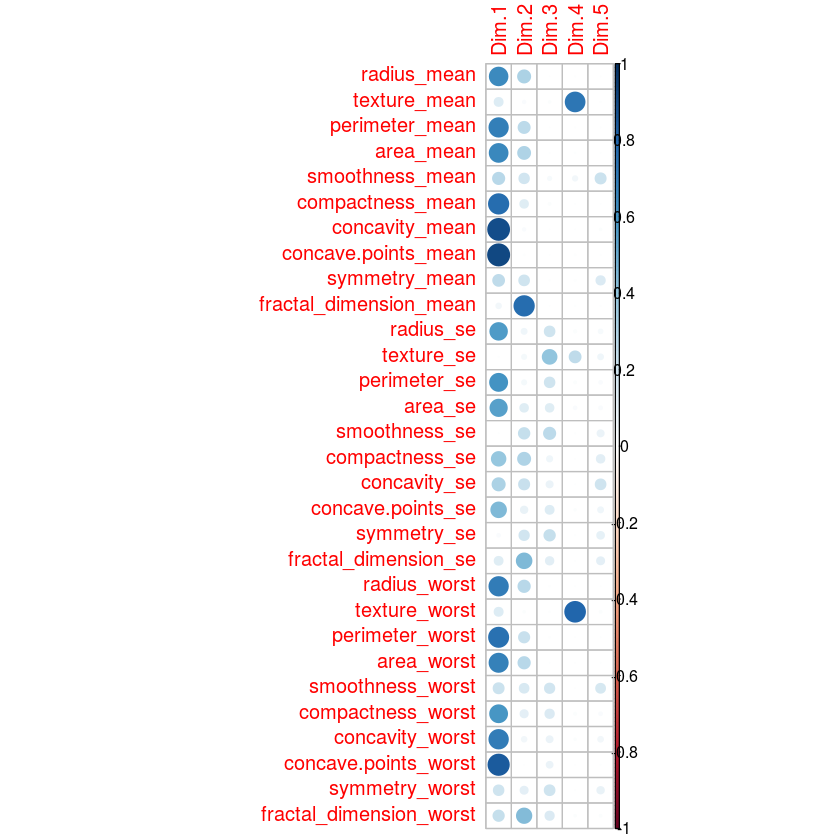

In [121]:
var <- get_pca_var(bc.pca)
var
corrplot(var$cos2)

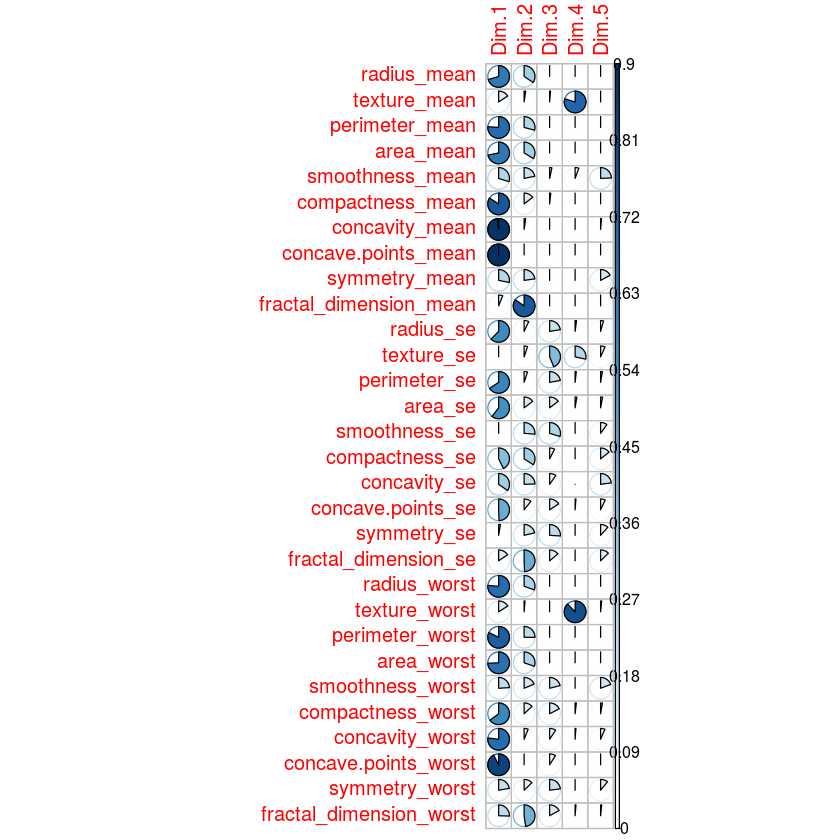

In [122]:
corrplot(bc.pca$var$cos2, is.corr=FALSE, method="pie")

# Qualidade de representação das variáveis

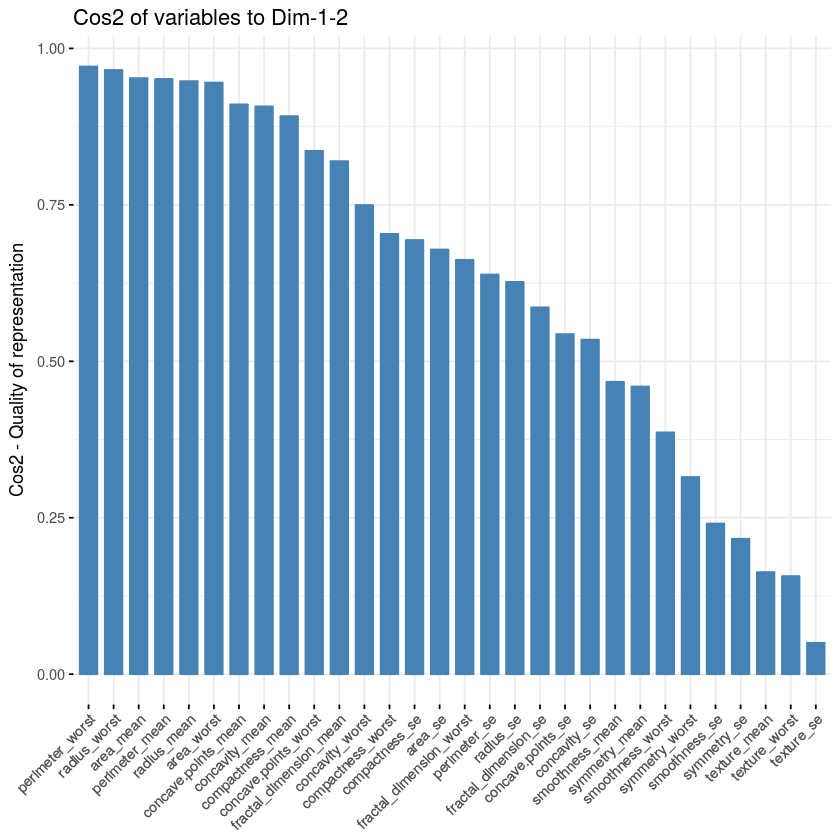

In [123]:
fviz_cos2(bc.pca, choice = "var", axes = 1:2)

# Círculo de correlação

- Observações são representadas pelas suas projeções e variáveis são representadas pelas suas correlações
- A distância da variável para a origem representa sua qualidade de representação

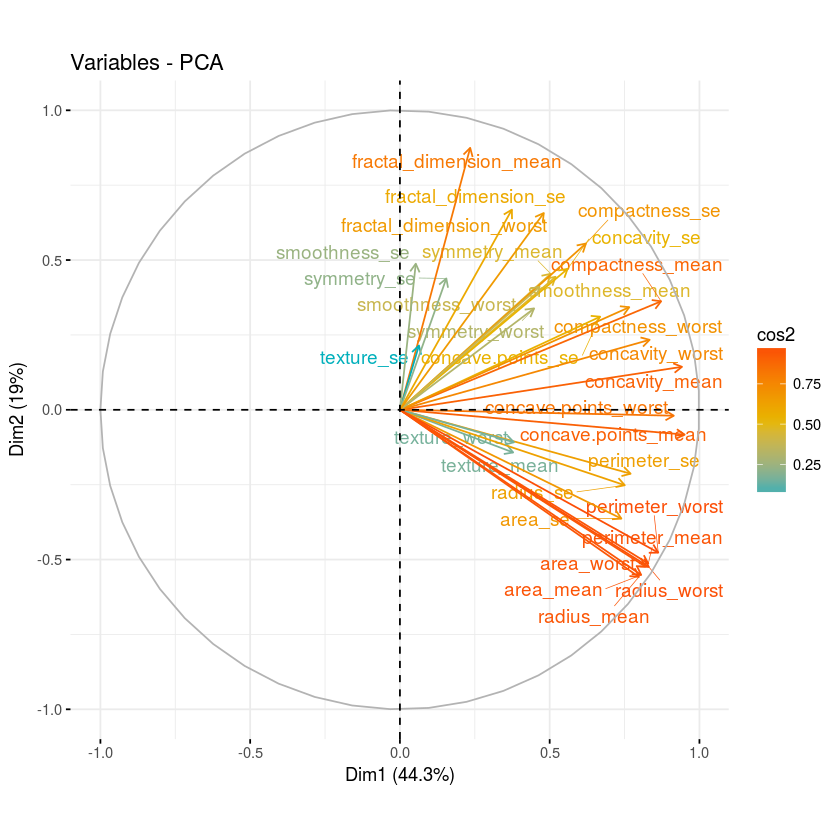

In [124]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(bc.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

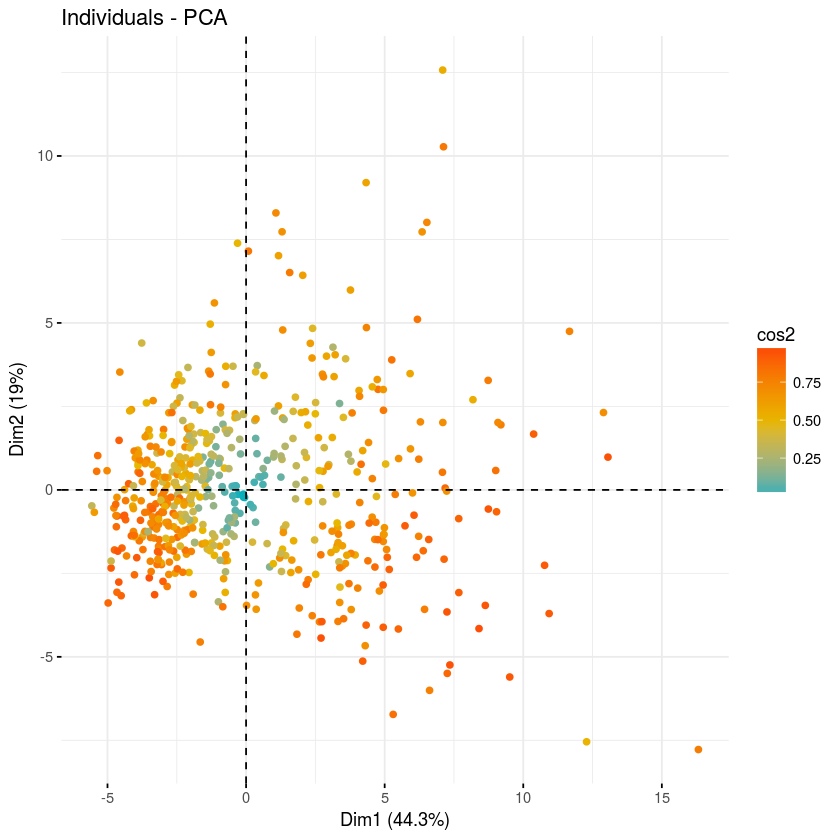

In [126]:
fviz_pca_ind(bc.pca, col.ind = "cos2", 
             geom.ind = "point",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             )

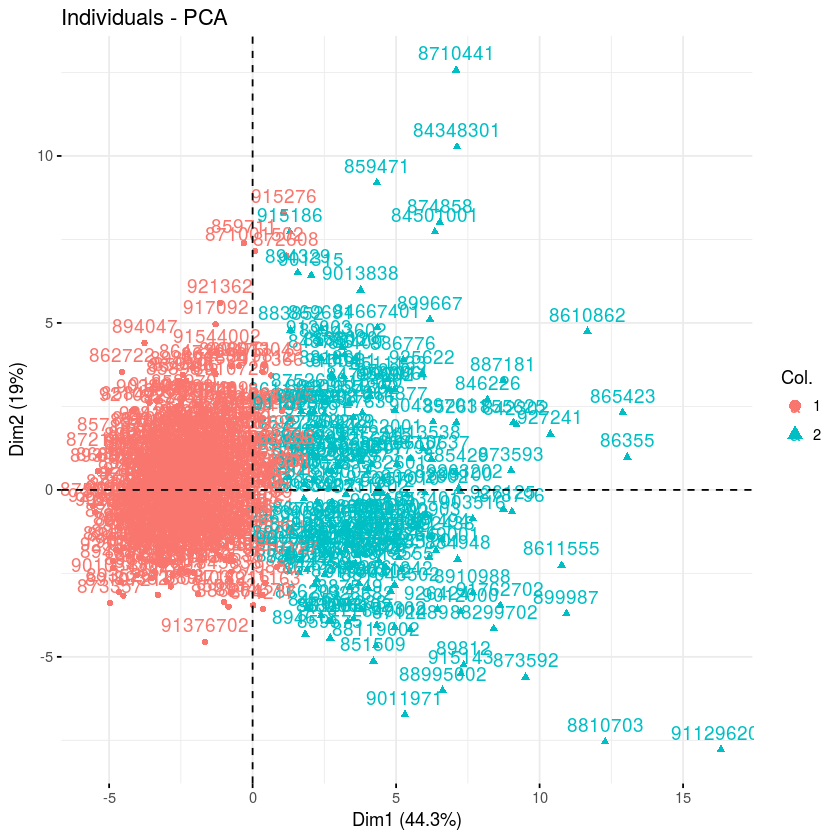

In [127]:
# Create a grouping variable using kmeans
# Create 2 groups of variables (centers = 2)
set.seed(123)
bc.km <- kmeans(bc.pca$ind$coord, centers = 2, nstart = 25)
grp <- as.factor(bc.km$cluster)
# Color variables by groups

fviz_pca_ind(bc.pca, col.ind = grp,
             )

In [128]:
bc.pca

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 569 individuals, described by 30 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error 

# Análise dos dados separados por diagnóstico
# Primeiro caso: diagnóstico M (Maligno)

In [129]:
# Carregando dados brutos# Carrega 
breastc.raw = read.csv("data.csv",stringsAsFactors = FALSE, header = TRUE, na.strings=c("","-","NA"))
# criando o data frame e nomeando indivíduos com base na coluna Country
breastc = data.frame(breastc.raw, row.names = breastc.raw$id, check.names = FALSE)

breastc = subset(breastc, select = -c(1,33)) 
head(breastc)

diagnosis radius_mean texture_mean perimeter_mean area_mean
842302   M         17.99       10.38        122.80         1001.0   
842517   M         20.57       17.77        132.90         1326.0   
84300903 M         19.69       21.25        130.00         1203.0   
84348301 M         11.42       20.38         77.58          386.1   
84358402 M         20.29       14.34        135.10         1297.0   
843786   M         12.45       15.70         82.57          477.1   
         smoothness_mean compactness_mean concavity_mean concave.points_mean
842302   0.11840         0.27760          0.3001         0.14710            
842517   0.08474         0.07864          0.0869         0.07017            
84300903 0.10960         0.15990          0.1974         0.12790            
84348301 0.14250         0.28390          0.2414         0.10520            
84358402 0.10030         0.13280          0.1980         0.10430            
843786   0.12780         0.17000          0.1578         0.08089            
         symmetry_mean ⋯ radius_worst texture_worst perimeter_worst area_worst
842302   0.2419        ⋯ 25.38        17.33         184.60          2019.0    
842517   0.1812        ⋯ 24.99        23.41         158.80          1956.0    
84300903 0.2069        ⋯ 23.57        25.53         152.50          1709.0    
84348301 0.2597        ⋯ 14.91        26.50          98.87           567.7    
84358402 0.1809        ⋯ 22.54        16.67         152.20          1575.0    
843786   0.2087        ⋯ 15.47        23.75         103.40           741.6    
         smoothness_worst compactness_worst concavity_worst
842302   0.1622           0.6656            0.7119         
842517   0.1238           0.1866            0.2416         
84300903 0.1444           0.4245            0.4504         
84348301 0.2098           0.8663            0.6869         
84358402 0.1374           0.2050            0.4000         
843786   0.1791           0.5249            0.5355         
         concave.points_worst symmetry_worst fractal_dimension_worst
842302   0.2654               0.4601         0.11890                
842517   0.1860               0.2750         0.08902                
84300903 0.2430               0.3613         0.08758                
84348301 0.2575               0.6638         0.17300                
84358402 0.1625               0.2364         0.07678                
843786   0.1741               0.3985         0.12440

In [130]:
bc_M = subset(breastc, diagnosis!="B")
bc_M = subset(bc_M, select = -c(1)) 
bc_M

radius_mean texture_mean perimeter_mean area_mean smoothness_mean
842302    17.99       10.38        122.80         1001.0    0.11840        
842517    20.57       17.77        132.90         1326.0    0.08474        
84300903  19.69       21.25        130.00         1203.0    0.10960        
84348301  11.42       20.38         77.58          386.1    0.14250        
84358402  20.29       14.34        135.10         1297.0    0.10030        
843786    12.45       15.70         82.57          477.1    0.12780        
844359    18.25       19.98        119.60         1040.0    0.09463        
84458202  13.71       20.83         90.20          577.9    0.11890        
844981    13.00       21.82         87.50          519.8    0.12730        
84501001  12.46       24.04         83.97          475.9    0.11860        
845636    16.02       23.24        102.70          797.8    0.08206        
84610002  15.78       17.89        103.60          781.0    0.09710        
846226    19.17       24.80        132.40         1123.0    0.09740        
846381    15.85       23.95        103.70          782.7    0.08401        
84667401  13.73       22.61         93.60          578.3    0.11310        
84799002  14.54       27.54         96.73          658.8    0.11390        
848406    14.68       20.13         94.74          684.5    0.09867        
84862001  16.13       20.68        108.10          798.8    0.11700        
849014    19.81       22.15        130.00         1260.0    0.09831        
8511133   15.34       14.26        102.50          704.4    0.10730        
851509    21.16       23.04        137.20         1404.0    0.09428        
852552    16.65       21.38        110.00          904.6    0.11210        
852631    17.14       16.40        116.00          912.7    0.11860        
852763    14.58       21.53         97.41          644.8    0.10540        
852781    18.61       20.25        122.10         1094.0    0.09440        
852973    15.30       25.27        102.40          732.4    0.10820        
853201    17.57       15.05        115.00          955.1    0.09847        
853401    18.63       25.11        124.80         1088.0    0.10640        
853612    11.84       18.70         77.93          440.6    0.11090        
85382601  17.02       23.98        112.80          899.3    0.11970        
⋮         ⋮           ⋮            ⋮              ⋮         ⋮              
9110127   18.03       16.85        117.50          990.0    0.08947        
9110732   17.75       28.03        117.30          981.6    0.09997        
911157302 21.10       20.52        138.10         1384.0    0.09684        
9111805   19.59       25.00        127.70         1191.0    0.10320        
911296201 17.08       27.15        111.20          930.9    0.09898        
911296202 27.42       26.27        186.90         2501.0    0.10840        
9113538   17.60       23.33        119.00          980.5    0.09289        
911916    16.25       19.51        109.80          815.8    0.10260        
913505    19.44       18.82        128.10         1167.0    0.10890        
913535    16.69       20.20        107.10          857.6    0.07497        
914062    18.01       20.56        118.40         1007.0    0.10010        
914769    18.49       17.52        121.30         1068.0    0.10120        
91485     20.59       21.24        137.80         1320.0    0.10850        
91504     13.82       24.49         92.33          595.9    0.11620        
915143    23.09       19.83        152.10         1682.0    0.09342        
915460    15.46       23.95        103.80          731.3    0.11830        
915691    13.40       20.52         88.64          556.7    0.11060        
91594602  15.05       19.07         97.26          701.9    0.09215        
916799    18.31       20.58        120.80         1052.0    0.10680        
916838    19.89       20.26        130.50         1214.0    0.10370        
91762702  24.63       21.60        165.50         1841.0  

radius_mean texture_mean perimeter_mean area_mean  
radius_mean              1.00000000  0.106516416  0.99528148     0.99007845
texture_mean             0.10651642  1.000000000  0.11068243     0.10372920
perimeter_mean           0.99528148  0.110682427  1.00000000     0.98722278
area_mean                0.99007845  0.103729204  0.98722278     1.00000000
smoothness_mean         -0.11603615 -0.143919896 -0.05240067    -0.08828141
compactness_mean         0.16916808  0.032566629  0.25640866     0.17018086
concavity_mean           0.48275037  0.067135235  0.55499400     0.49315145
concave.points_mean      0.67551912  0.017452918  0.73015831     0.67751304
symmetry_mean           -0.07644230 -0.090009368 -0.01432876    -0.08082837
fractal_dimension_mean  -0.38867852 -0.061559348 -0.31356336    -0.36861183
radius_se                0.63926965  0.038680874  0.65408346     0.68576550
texture_se               0.04687304  0.305949798  0.06834889     0.05146227
perimeter_se             0.62478537  0.060223129  0.65134605     0.67073213
area_se                  0.69235898  0.048521835  0.70473557     0.75465213
smoothness_se            0.02803740  0.042510904  0.05187314     0.04179226
compactness_se           0.07825081  0.127410603  0.14404185     0.07498076
concavity_se             0.19757070  0.110111089  0.25744873     0.19655587
concave.points_se        0.23470949  0.040929709  0.27601241     0.22582620
symmetry_se              0.03372713 -0.060615142  0.06990229     0.03336826
fractal_dimension_se    -0.03676151  0.065562278  0.02500191    -0.03525436
radius_worst             0.92165330  0.126022397  0.91573989     0.92031968
texture_worst           -0.08888970  0.846831480 -0.08569035    -0.08175112
perimeter_worst          0.91487709  0.136605074  0.92205536     0.91572754
area_worst               0.89393498  0.126697771  0.88904626     0.91139574
smoothness_worst        -0.32664876 -0.024013321 -0.28308669    -0.29803759
compactness_worst       -0.11482397  0.104079667 -0.04861839    -0.10810402
concavity_worst          0.06962069  0.110075089  0.13497671     0.07714971
concave.points_worst     0.38346081 -0.002213297  0.43778639     0.38571708
symmetry_worst          -0.26637550 -0.087386065 -0.23174239    -0.27064802
fractal_dimension_worst -0.38336710  0.025960038 -0.32654875    -0.36624349
                        smoothness_mean compactness_mean concavity_mean
radius_mean             -0.11603615     0.16916808        0.48275037   
texture_mean            -0.14391990     0.03256663        0.06713524   
perimeter_mean          -0.05240067     0.25640866        0.55499400   
area_mean               -0.08828141     0.17018086        0.49315145   
smoothness_mean          1.00000000     0.67643291        0.63508391   
compactness_mean         0.67643291     1.00000000        0.84771208   
concavity_mean           0.63508391     0.84771208        1.00000000   
concave.points_mean      0.54864145     0.72734886        0.90711874   
symmetry_mean            0.57821587     0.69806093        0.53816580   
fractal_dimension_mean   0.75168981     0.75631810        0.46673659   
radius_se                0.12788539     0.25289620        0.46530792   
texture_se               0.15953057     0.16183491        0.19061490   
perimeter_se             0.13868197     0.33443954        0.51469611   
area_se                  0.09074227     0.21842327        0.46654651   
smoothness_se            0.31345561     0.20301374        0.29259912   
compactness_se           0.38157292     0.74780030        0.61655964   
concavity_se             0.37654714     0.64019054        0.71548728   
concave.points_se        0.19947261     0.44499093        0.47080803   
symmetry_se              0.25870921     0.40165118        0.33885928   
fractal_dimension_se     0.46686311     0.66363473        0.51902771   
radius_worst            -0.07808977     0.17829136        0.43451740   
texture_worst           -0.04947909     0.01658136       -0.02314853   
perimeter_wo

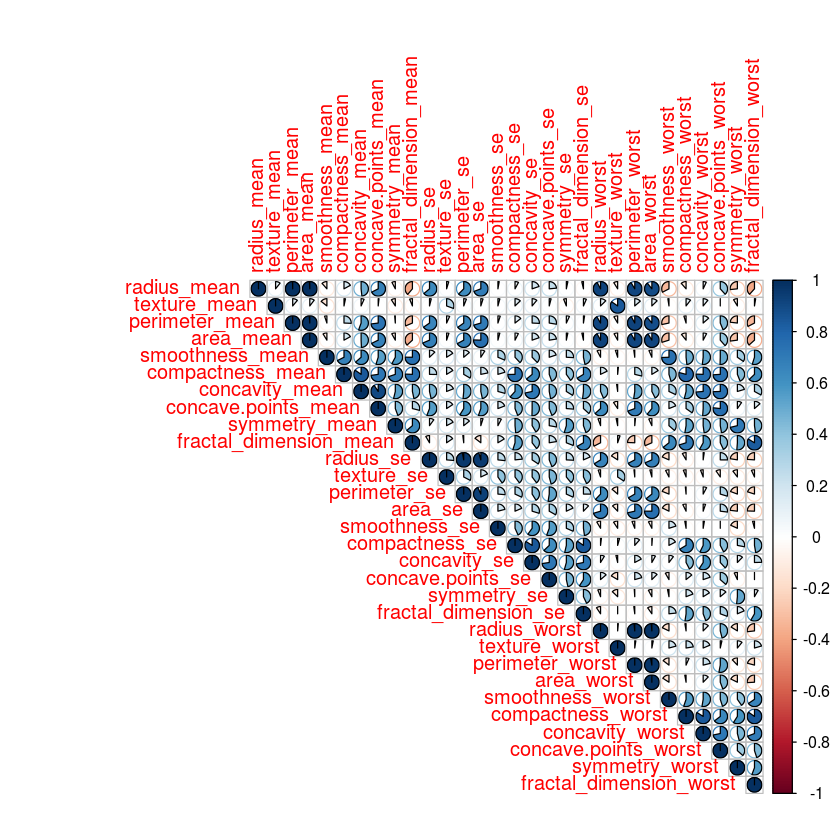

In [131]:
# Gerando matriz de correlacao
suppressWarnings(library("psych"))
bc_M_corr = corr.test(bc_M)
bc_M_corr$r
# Plot da análise da correlação # Plot da 
corrplot(bc_M_corr$r, method="pie", type="upper")

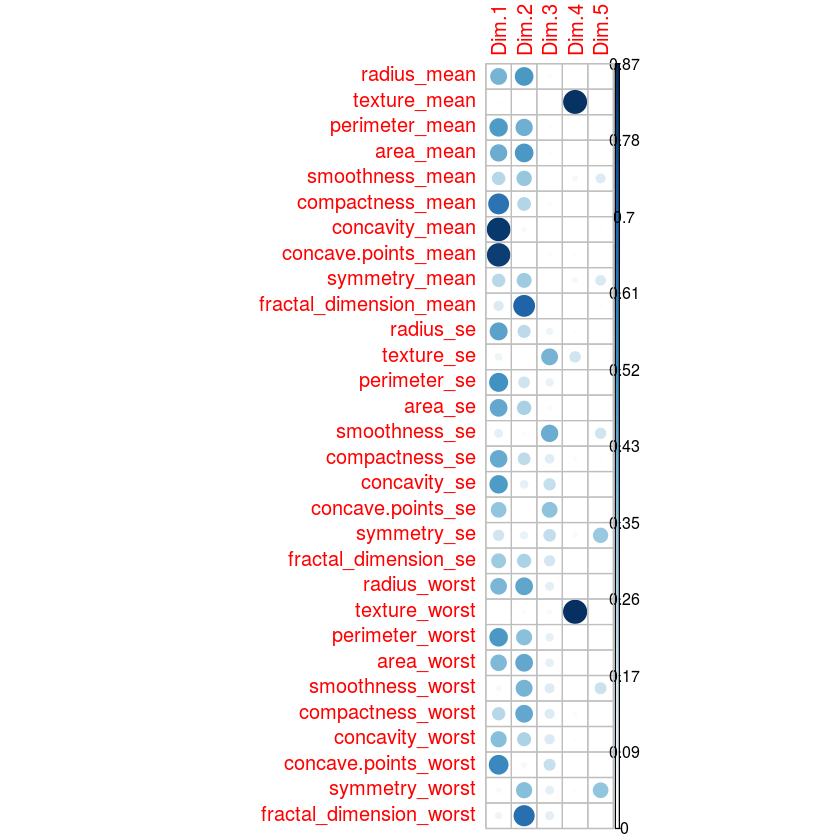

In [133]:
library(FactoMineR)
bc_M.pca <- PCA(bc_M, graph = FALSE)
corrplot(bc_M.pca$var$cos2, is.corr=FALSE)

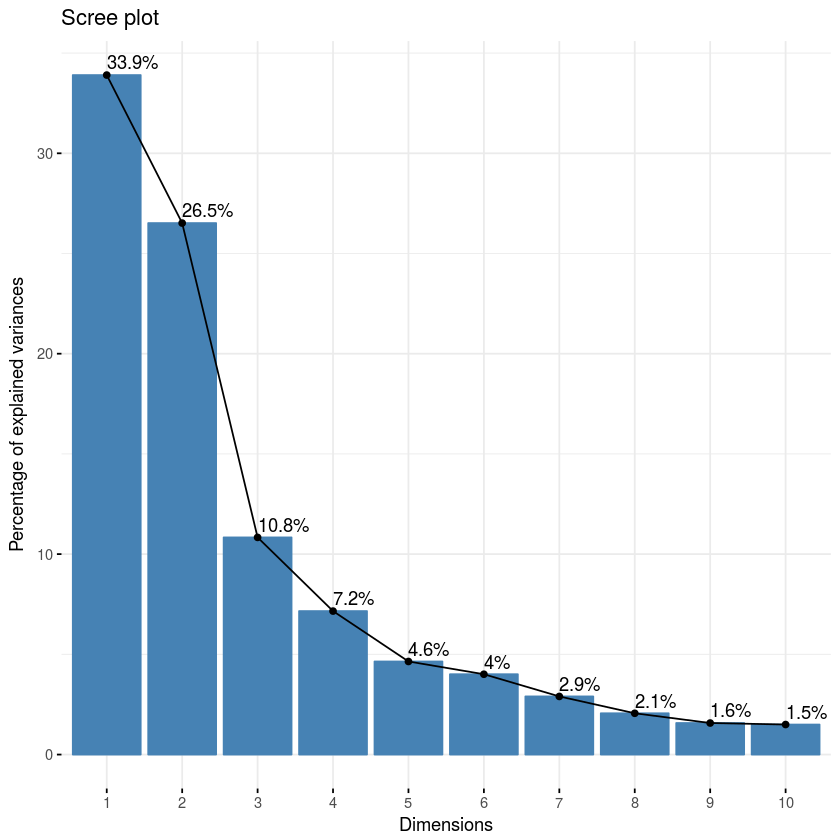

In [140]:
fviz_screeplot(bc_M.pca, addlabels = TRUE)

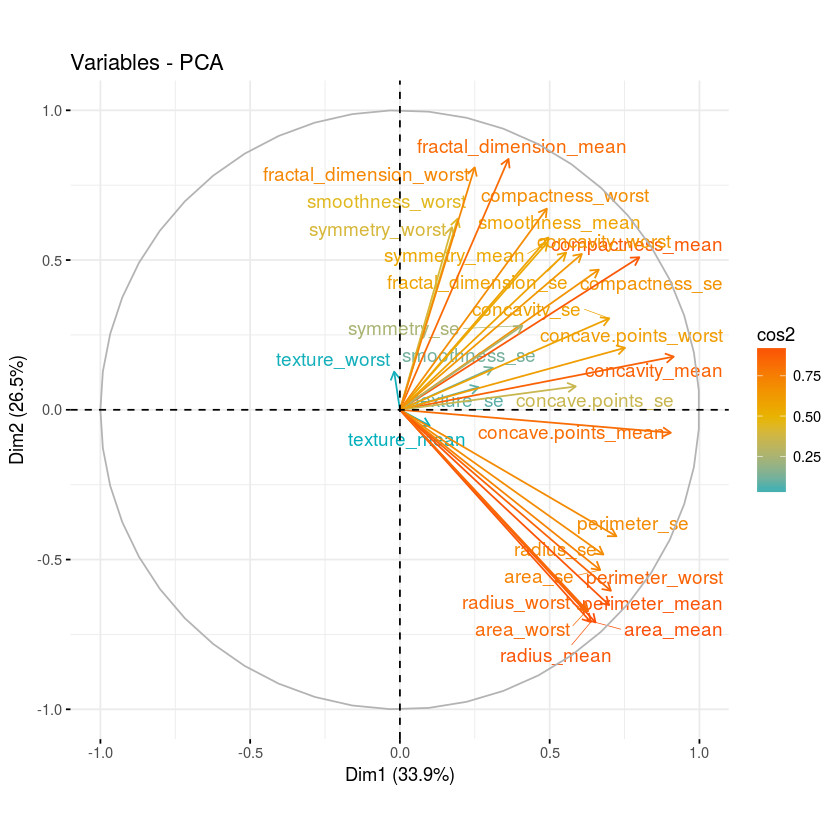

In [134]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(bc_M.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

# Segundo caso: diagnóstico B (Benigno)

In [135]:
# Carregando dados brutos# Carrega 
breastc.raw = read.csv("data.csv",stringsAsFactors = FALSE, header = TRUE, na.strings=c("","-","NA"))
# criando o data frame e nomeando indivíduos com base na coluna Country
breastc = data.frame(breastc.raw, row.names = breastc.raw$id, check.names = FALSE)

breastc = subset(breastc, select = -c(1,33)) 
head(breastc)

diagnosis radius_mean texture_mean perimeter_mean area_mean
842302   M         17.99       10.38        122.80         1001.0   
842517   M         20.57       17.77        132.90         1326.0   
84300903 M         19.69       21.25        130.00         1203.0   
84348301 M         11.42       20.38         77.58          386.1   
84358402 M         20.29       14.34        135.10         1297.0   
843786   M         12.45       15.70         82.57          477.1   
         smoothness_mean compactness_mean concavity_mean concave.points_mean
842302   0.11840         0.27760          0.3001         0.14710            
842517   0.08474         0.07864          0.0869         0.07017            
84300903 0.10960         0.15990          0.1974         0.12790            
84348301 0.14250         0.28390          0.2414         0.10520            
84358402 0.10030         0.13280          0.1980         0.10430            
843786   0.12780         0.17000          0.1578         0.08089            
         symmetry_mean ⋯ radius_worst texture_worst perimeter_worst area_worst
842302   0.2419        ⋯ 25.38        17.33         184.60          2019.0    
842517   0.1812        ⋯ 24.99        23.41         158.80          1956.0    
84300903 0.2069        ⋯ 23.57        25.53         152.50          1709.0    
84348301 0.2597        ⋯ 14.91        26.50          98.87           567.7    
84358402 0.1809        ⋯ 22.54        16.67         152.20          1575.0    
843786   0.2087        ⋯ 15.47        23.75         103.40           741.6    
         smoothness_worst compactness_worst concavity_worst
842302   0.1622           0.6656            0.7119         
842517   0.1238           0.1866            0.2416         
84300903 0.1444           0.4245            0.4504         
84348301 0.2098           0.8663            0.6869         
84358402 0.1374           0.2050            0.4000         
843786   0.1791           0.5249            0.5355         
         concave.points_worst symmetry_worst fractal_dimension_worst
842302   0.2654               0.4601         0.11890                
842517   0.1860               0.2750         0.08902                
84300903 0.2430               0.3613         0.08758                
84348301 0.2575               0.6638         0.17300                
84358402 0.1625               0.2364         0.07678                
843786   0.1741               0.3985         0.12440

In [136]:
bc_B = subset(breastc, diagnosis!="M")
bc_B = subset(bc_B, select = -c(1)) 
bc_B

radius_mean texture_mean perimeter_mean area_mean smoothness_mean
8510426  13.540      14.36        87.46          566.3     0.09779        
8510653  13.080      15.71        85.63          520.0     0.10750        
8510824   9.504      12.44        60.34          273.9     0.10240        
854941   13.030      18.42        82.61          523.8     0.08983        
85713702  8.196      16.84        51.71          201.9     0.08600        
857155   12.050      14.63        78.04          449.3     0.10310        
857156   13.490      22.30        86.91          561.0     0.08752        
857343   11.760      21.60        74.72          427.9     0.08637        
857373   13.640      16.34        87.21          571.8     0.07685        
857374   11.940      18.24        75.71          437.6     0.08261        
85759902 11.520      18.75        73.34          409.0     0.09524        
857810   13.050      19.31        82.61          527.2     0.08060        
858477    8.618      11.79        54.34          224.5     0.09752        
858970   10.170      14.88        64.55          311.9     0.11340        
858981    8.598      20.98        54.66          221.8     0.12430        
859196    9.173      13.86        59.20          260.9     0.07721        
859464    9.465      21.01        60.11          269.4     0.10440        
859465   11.310      19.04        71.80          394.1     0.08139        
859471    9.029      17.33        58.79          250.5     0.10660        
859487   12.780      16.49        81.37          502.5     0.09831        
859711    8.888      14.64        58.79          244.0     0.09783        
8610175  12.310      16.52        79.19          470.9     0.09172        
8610629  13.530      10.94        87.91          559.2     0.12910        
8610908  12.860      18.00        83.19          506.3     0.09934        
861103   11.450      20.97        73.81          401.5     0.11020        
8611161  13.340      15.86        86.49          520.0     0.10780        
8612080  12.000      15.65        76.95          443.3     0.09723        
861597   12.360      21.80        79.78          466.1     0.08772        
861598   14.640      15.24        95.77          651.9     0.11320        
861648   14.620      24.02        94.57          662.7     0.08974        
⋮        ⋮           ⋮            ⋮              ⋮         ⋮              
91858    11.750      17.56        75.89          422.9     0.10730        
91903901 11.670      20.02        75.21          416.2     0.10160        
91903902 13.680      16.33        87.76          575.5     0.09277        
919537   10.960      17.62        70.79          365.6     0.09687        
919812   11.690      24.44        76.37          406.4     0.12360        
921092    7.729      25.49        47.98          178.8     0.08098        
921362    7.691      25.44        48.34          170.4     0.08668        
921385   11.540      14.44        74.65          402.9     0.09984        
921386   14.470      24.99        95.81          656.4     0.08837        
921644   14.740      25.42        94.70          668.6     0.08275        
922296   13.210      28.06        84.88          538.4     0.08671        
922297   13.870      20.70        89.77          584.8     0.09578        
922576   13.620      23.23        87.19          573.2     0.09246        
922577   10.320      16.35        65.31          324.9     0.09434        
922840   10.260      16.58        65.85          320.8     0.08877        
923169    9.683      19.34        61.05          285.7     0.08491        
923465   10.820      24.21        68.89          361.6     0.08192        
923748   10.860      21.48        68.51          360.5     0.07431        
923780   11.130      22.44        71.49          378.4     0.09566        
924084   12.770      29.43        81.35          507.9     0.08276        
924342    9.333      21.94        59.01          264.0     0.09240        
924632   12.880      28.92        

radius_mean   texture_mean perimeter_mean area_mean  
radius_mean              1.0000000000 -0.037149839  0.99676880     0.99443489
texture_mean            -0.0371498387  1.000000000 -0.03992297    -0.03905478
perimeter_mean           0.9967687954 -0.039922968  1.00000000     0.99065335
area_mean                0.9944348857 -0.039054782  0.99065335     1.00000000
smoothness_mean         -0.1851176417 -0.233814389 -0.14872897    -0.20312779
compactness_mean         0.0604423315 -0.058694883  0.13541138     0.05235297
concavity_mean           0.0867568698 -0.023083781  0.14761202     0.09231716
concave.points_mean      0.4118447307 -0.142534941  0.46551885     0.40339703
symmetry_mean           -0.2355758121 -0.068707050 -0.20895687    -0.23739083
fractal_dimension_mean  -0.5334918868 -0.089063462 -0.47952132    -0.52694681
radius_se               -0.0277610804  0.104486016 -0.01064550    -0.00948810
texture_se              -0.3108152795  0.486223621 -0.30926285    -0.30496709
perimeter_se             0.0008490017  0.116176258  0.03151331     0.01519925
area_se                  0.3289883934  0.095981199  0.34238007     0.34582563
smoothness_se           -0.5662798332  0.035519634 -0.54633577    -0.55329381
compactness_se          -0.1211621564  0.051963083 -0.05847562    -0.11471102
concavity_se            -0.1123023961  0.019254403 -0.06595792    -0.10300733
concave.points_se        0.0252722172 -0.032507128  0.07711911     0.02077354
symmetry_se             -0.4230848665  0.072889435 -0.40808148    -0.41313043
fractal_dimension_se    -0.2559055088  0.008620418 -0.20661379    -0.24326396
radius_worst             0.9769798084 -0.026222880  0.97468800     0.97361430
texture_worst           -0.0353213134  0.918361737 -0.04025167    -0.03916047
perimeter_worst          0.9626486789 -0.026052592  0.96983341     0.95826607
area_worst               0.9702004745 -0.027281554  0.96693422     0.97747758
smoothness_worst        -0.2968403029 -0.176315292 -0.26914817    -0.30725916
compactness_worst        0.1294178525 -0.012706163  0.19316816     0.12037848
concavity_worst          0.1169608219 -0.010458507  0.16979809     0.11734845
concave.points_worst     0.4270681120 -0.106140556  0.47549420     0.41345285
symmetry_worst          -0.1467184054 -0.085015010 -0.12930108    -0.15293535
fractal_dimension_worst -0.3093107507 -0.057025923 -0.25477993    -0.30710669
                        smoothness_mean compactness_mean concavity_mean
radius_mean             -0.18511764      0.060442331      0.08675687   
texture_mean            -0.23381439     -0.058694883     -0.02308378   
perimeter_mean          -0.14872897      0.135411381      0.14761202   
area_mean               -0.20312779      0.052352975      0.09231716   
smoothness_mean          1.00000000      0.561332968      0.22438432   
compactness_mean         0.56133297      1.000000000      0.75499408   
concavity_mean           0.22438432      0.754994084      1.00000000   
concave.points_mean      0.46149220      0.750119141      0.71182271   
symmetry_mean            0.45210101      0.381422203      0.26161841   
fractal_dimension_mean   0.56033603      0.692197829      0.52300364   
radius_se                0.18551832      0.243990586      0.24963538   
texture_se               0.03882955     -0.006240607      0.06479714   
perimeter_se             0.16630758      0.365309843      0.34191520   
area_se                  0.07914189      0.215012986      0.23627767   
smoothness_se            0.41897319      0.247530339      0.13432045   
compactness_se           0.15245644      0.744763822      0.78544956   
concavity_se             0.10356233      0.561314056      0.90098972   
concave.points_se        0.31560834      0.668577935      0.79733101   
symmetry_se              0.19359083      0.142018777      0.13252520   
fractal_dimension_se     0.20393807      0.598926384      0.67242572   
radius_worst            -0.17194160      0.073873666      0.09230069   
texture_worst         

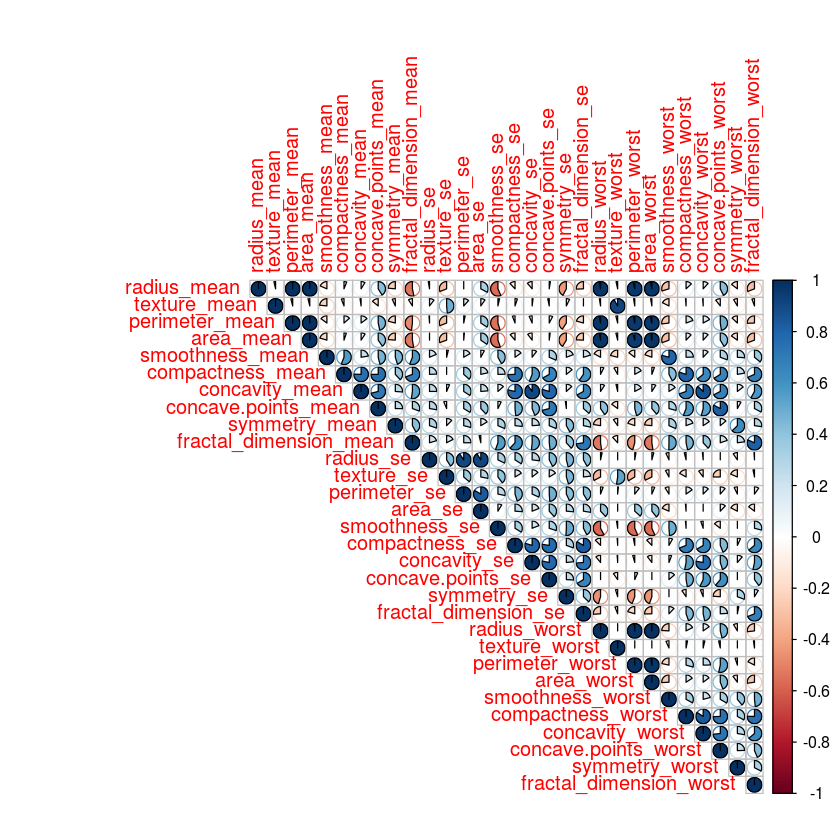

In [137]:
# Gerando matriz de correlacao
suppressWarnings(library("psych"))
bc_B_corr = corr.test(bc_B)
bc_B_corr$r
# Plot da análise da correlação # Plot da 
corrplot(bc_B_corr$r, method="pie", type="upper")

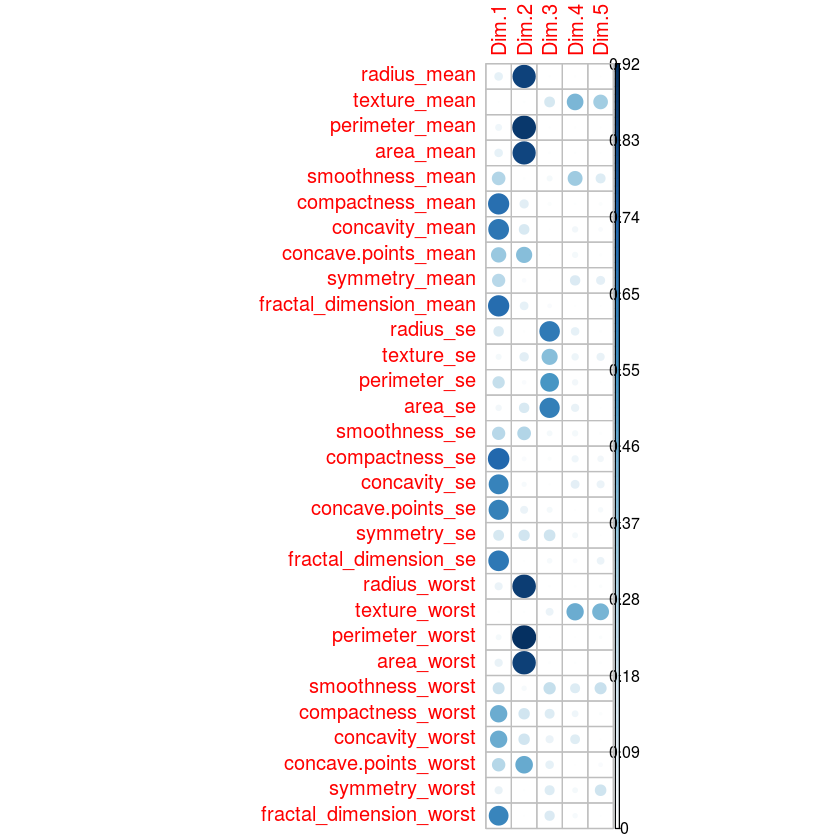

In [138]:
bc_B.pca <- PCA(bc_B, graph = FALSE)
corrplot(bc_B.pca$var$cos2, is.corr=FALSE)

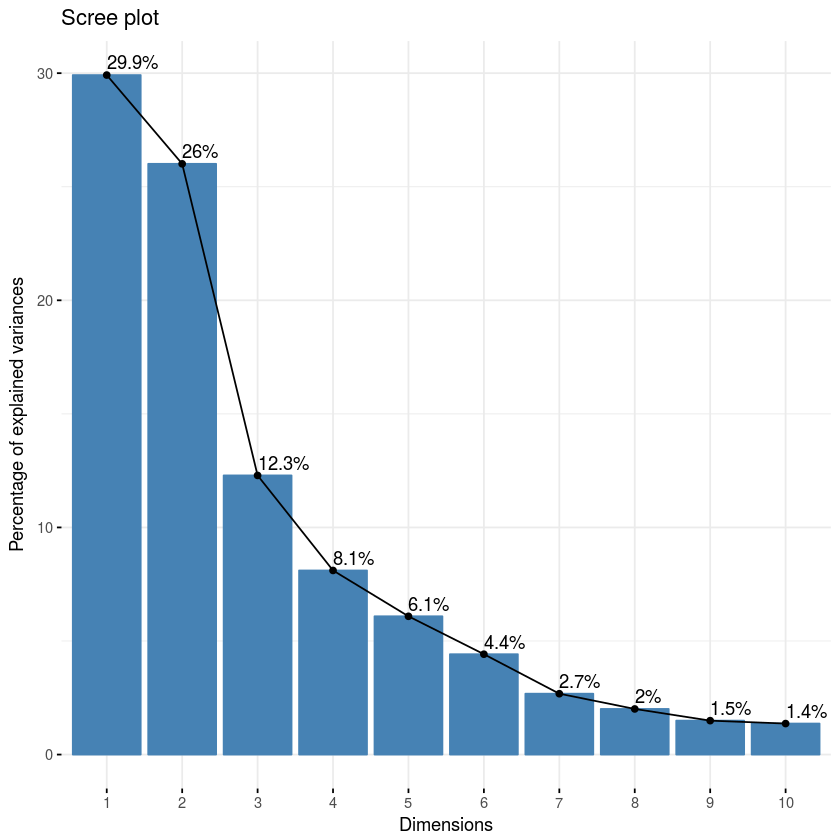

In [141]:
fviz_screeplot(bc_B.pca, addlabels = TRUE)

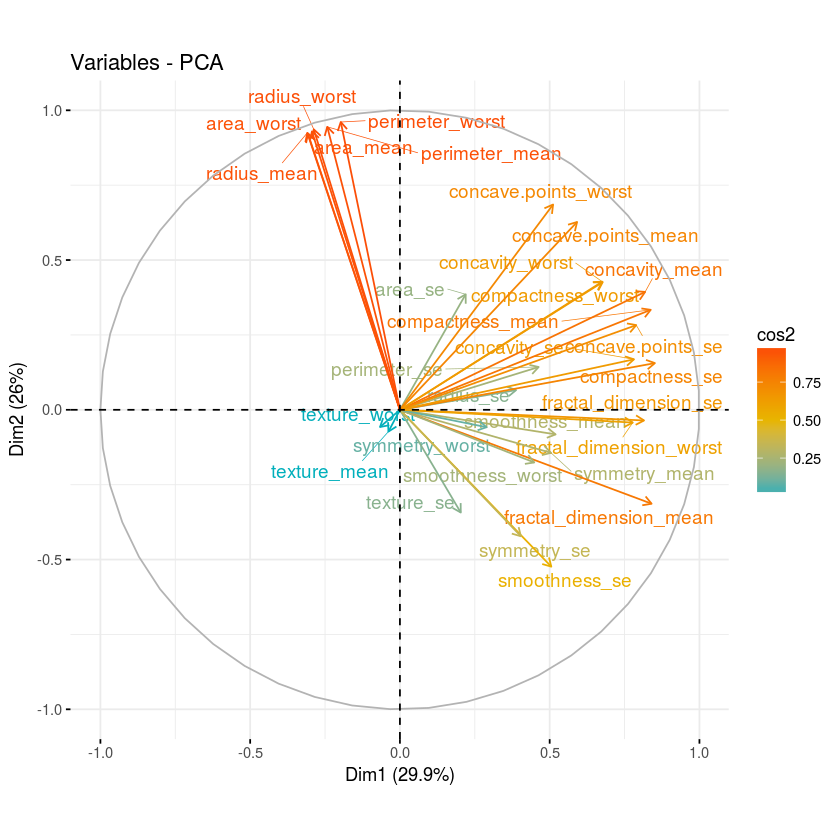

In [139]:
# Color by cos2 values: quality on the factor map
fviz_pca_var(bc_B.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping
             )

# Analisando o Dataset com base no diagnóstico
Fonta das funções utilizadas: https://shiring.github.io/machine_learning/2017/01/15/rfe_ga_post

In [89]:
# plotting theme

library(ggplot2)

my_theme <- function(base_size = 12, base_family = "sans"){
  theme_minimal(base_size = base_size, base_family = base_family) +
  theme(
    axis.text = element_text(size = 12),
    axis.text.x = element_text(angle = 0, vjust = 0.5, hjust = 0.5),
    axis.title = element_text(size = 14),
    panel.grid.major = element_line(color = "grey"),
    panel.grid.minor = element_blank(),
    panel.background = element_rect(fill = "aliceblue"),
    strip.background = element_rect(fill = "navy", color = "navy", size = 1),
    strip.text = element_text(face = "bold", size = 12, color = "white"),
    legend.position = "right",
    legend.justification = "top", 
    legend.background = element_blank(),
    panel.border = element_rect(color = "grey", fill = NA, size = 0.5)
  )
}

theme_set(my_theme())

In [92]:
# function for PCA plotting
library(pcaGoPromoter)
library(ellipse)

pca_func <- function(data, groups, title, print_ellipse = TRUE) {
  
  # perform pca and extract scores
  pcaOutput <- pca(data, printDropped = FALSE, scale = TRUE, center = TRUE)
  pcaOutput2 <- as.data.frame(pcaOutput$scores)
  
  # define groups for plotting
  pcaOutput2$groups <- groups
  
  # when plotting samples calculate ellipses for plotting (when plotting features, there are no replicates)
  if (print_ellipse) {
    
    centroids <- aggregate(cbind(PC1, PC2) ~ groups, pcaOutput2, mean)
    conf.rgn  <- do.call(rbind, lapply(unique(pcaOutput2$groups), function(t)
      data.frame(groups = as.character(t),
                 ellipse(cov(pcaOutput2[pcaOutput2$groups == t, 1:2]),
                       centre = as.matrix(centroids[centroids$groups == t, 2:3]),
                       level = 0.95),
                 stringsAsFactors = FALSE)))
    
    plot <- ggplot(data = pcaOutput2, aes(x = PC1, y = PC2, group = groups, color = groups)) + 
      geom_polygon(data = conf.rgn, aes(fill = groups), alpha = 0.2) +
      geom_point(size = 2, alpha = 0.6) + 
      scale_color_brewer(palette = "Set1") +
      labs(title = title,
           color = "",
           fill = "",
           x = paste0("PC1: ", round(pcaOutput$pov[1], digits = 2) * 100, "% variance"),
           y = paste0("PC2: ", round(pcaOutput$pov[2], digits = 2) * 100, "% variance"))
    
  } else {
    
    # if there are fewer than 10 groups (e.g. the predictor classes) I want to have colors from RColorBrewer
    if (length(unique(pcaOutput2$groups)) <= 10) {
      
      plot <- ggplot(data = pcaOutput2, aes(x = PC1, y = PC2, group = groups, color = groups)) + 
        geom_point(size = 2, alpha = 0.6) + 
        scale_color_brewer(palette = "Set1") +
        labs(title = title,
             color = "",
             fill = "",
             x = paste0("PC1: ", round(pcaOutput$pov[1], digits = 2) * 100, "% variance"),
             y = paste0("PC2: ", round(pcaOutput$pov[2], digits = 2) * 100, "% variance"))
      
    } else {
      
      # otherwise use the default rainbow colors
      plot <- ggplot(data = pcaOutput2, aes(x = PC1, y = PC2, group = groups, color = groups)) + 
        geom_point(size = 2, alpha = 0.6) + 
        labs(title = title,
             color = "",
             fill = "",
             x = paste0("PC1: ", round(pcaOutput$pov[1], digits = 2) * 100, "% variance"),
             y = paste0("PC2: ", round(pcaOutput$pov[2], digits = 2) * 100, "% variance"))
      
    }
  }
  
  return(plot)
  
}

library(gridExtra)
library(grid)

id       diagnosis radius_mean texture_mean perimeter_mean area_mean
842302     842302 M         17.99       10.38        122.80         1001.0   
842517     842517 M         20.57       17.77        132.90         1326.0   
84300903 84300903 M         19.69       21.25        130.00         1203.0   
84348301 84348301 M         11.42       20.38         77.58          386.1   
84358402 84358402 M         20.29       14.34        135.10         1297.0   
843786     843786 M         12.45       15.70         82.57          477.1   
         smoothness_mean compactness_mean concavity_mean concave.points_mean ⋯
842302   0.11840         0.27760          0.3001         0.14710             ⋯
842517   0.08474         0.07864          0.0869         0.07017             ⋯
84300903 0.10960         0.15990          0.1974         0.12790             ⋯
84348301 0.14250         0.28390          0.2414         0.10520             ⋯
84358402 0.10030         0.13280          0.1980         0.10430             ⋯
843786   0.12780         0.17000          0.1578         0.08089             ⋯
         texture_worst perimeter_worst area_worst smoothness_worst
842302   17.33         184.60          2019.0     0.1622          
842517   23.41         158.80          1956.0     0.1238          
84300903 25.53         152.50          1709.0     0.1444          
84348301 26.50          98.87           567.7     0.2098          
84358402 16.67         152.20          1575.0     0.1374          
843786   23.75         103.40           741.6     0.1791          
         compactness_worst concavity_worst concave.points_worst symmetry_worst
842302   0.6656            0.7119          0.2654               0.4601        
842517   0.1866            0.2416          0.1860               0.2750        
84300903 0.4245            0.4504          0.2430               0.3613        
84348301 0.8663            0.6869          0.2575               0.6638        
84358402 0.2050            0.4000          0.1625               0.2364        
843786   0.5249            0.5355          0.1741               0.3985        
         fractal_dimension_worst X 
842302   0.11890                 NA
842517   0.08902                 NA
84300903 0.08758                 NA
84348301 0.17300                 NA
84358402 0.07678                 NA
843786   0.12440                 NA

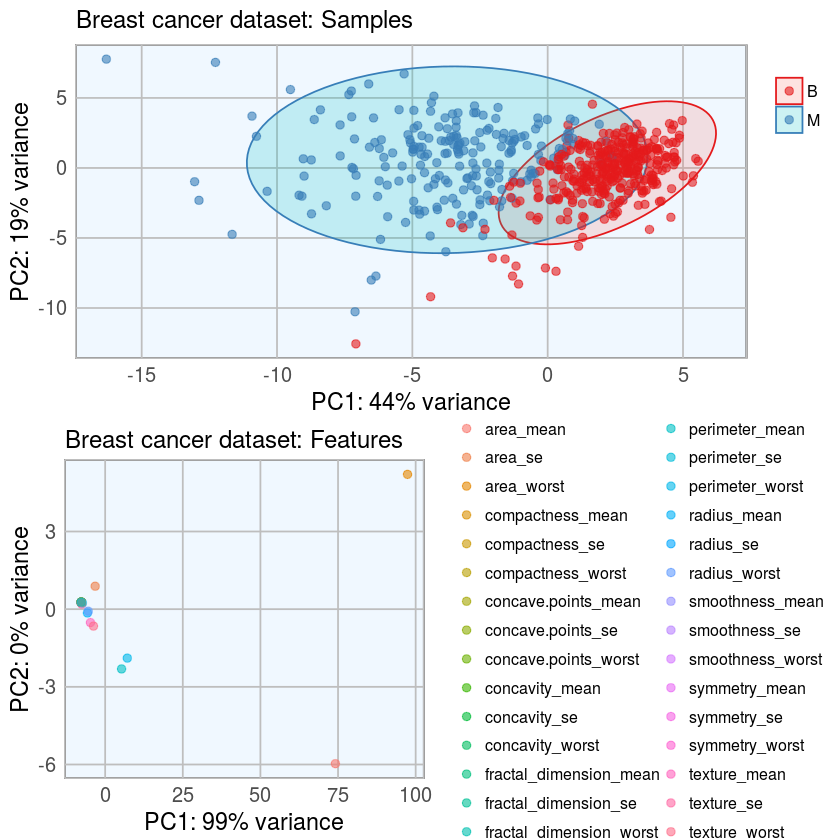

In [128]:
# Carregando dados brutos
breastc.raw = read.csv("data.csv",stringsAsFactors = FALSE, header = TRUE, na.strings=c("","-","NA"))
# criando o data frame e nomeando indivíduos com base na coluna Country
breastc = data.frame(breastc.raw, row.names = breastc.raw$id, check.names = FALSE)

#breastc = subset(breastc, select = -c(1,33)) 
head(breastc)

p1 <- pca_func(data = t(breastc[, 3:32]), groups = as.character(breastc$diagnosis), title = "Breast cancer dataset: Samples")
p2 <- pca_func(data = breastc[, 3:32], groups = as.character(colnames(breastc[, 3:32])), title = "Breast cancer dataset: Features", print_ellipse = FALSE)
grid.arrange(p1, p2, ncol = 1, widths = c(0.4))

### Com duas variáveis é possível fazer um clustering em elípses com uma boa precisão